# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline


'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('./Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('./AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
azdias.head()
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print(azdias.shape)
feat_info.shape

(891221, 85)


(85, 4)

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [5]:
#missing_or_unknown list max length
feat_info.iloc[:, 3].apply(lambda x: x.strip("[").strip("]").split(",").__len__()).max()

3

In [6]:
feat_info['attribute'][1]
azdias[feat_info['attribute'][1]]
feat_info['missing_or_unknown'][1].__str__().strip("[").strip("]").split(",")
feat_info.shape
feat_info['attribute'][3]

'CJT_GESAMTTYP'

In [7]:
feat_info.iloc[:, [0, 3]]

,attribute,missing_or_unknown
0,AGER_TYP,"[-1,0]"
1,ALTERSKATEGORIE_GROB,"[-1,0,9]"
2,ANREDE_KZ,"[-1,0]"
3,CJT_GESAMTTYP,[0]
4,FINANZ_MINIMALIST,[-1]
5,FINANZ_SPARER,[-1]
6,FINANZ_VORSORGER,[-1]
7,FINANZ_ANLEGER,[-1]
8,FINANZ_UNAUFFAELLIGER,[-1]
9,FINANZ_HAUSBAUER,[-1]


In [8]:
feat_info['missing_or_unknown'][4].strip("[]").split(",")

['-1']

In [9]:
# Identify missing or unknown data values and convert them to NaNs.


checklist = []

for i in range(0, feat_info.shape[0]):
    chg =feat_info['missing_or_unknown'][i].strip("[]").split(",")
    print(chg)
    for item in chg:

        if item.isdigit():
            if azdias[feat_info['attribute'][i]].dtype == float:
                    item = float(item)
            if azdias[feat_info['attribute'][i]].dtype == int:
                    item = int(item)
        print(item)
        print(feat_info['attribute'][i])
            
        azdias[feat_info['attribute'][i]] = azdias[feat_info['attribute'][i]].apply(lambda x: np.nan if x.__str__() == item.__str__() else x)


['-1', '0']
-1
AGER_TYP
0.0
AGER_TYP
['-1', '0', '9']
-1
ALTERSKATEGORIE_GROB
0
ALTERSKATEGORIE_GROB
9
ALTERSKATEGORIE_GROB
['-1', '0']
-1
ANREDE_KZ
0
ANREDE_KZ
['0']
0.0
CJT_GESAMTTYP
['-1']
-1
FINANZ_MINIMALIST
['-1']
-1
FINANZ_SPARER
['-1']
-1
FINANZ_VORSORGER
['-1']
-1
FINANZ_ANLEGER
['-1']
-1
FINANZ_UNAUFFAELLIGER
['-1']
-1
FINANZ_HAUSBAUER
['-1']
-1
FINANZTYP
['0']
0
GEBURTSJAHR
['']

GFK_URLAUBERTYP
['']

GREEN_AVANTGARDE
['-1', '0']
-1
HEALTH_TYP
0.0
HEALTH_TYP
['0']
0.0
LP_LEBENSPHASE_FEIN
['0']
0.0
LP_LEBENSPHASE_GROB
['0']
0.0
LP_FAMILIE_FEIN
['0']
0.0
LP_FAMILIE_GROB
['0']
0.0
LP_STATUS_FEIN
['0']
0.0
LP_STATUS_GROB
['-1', '0']
-1
NATIONALITAET_KZ
0
NATIONALITAET_KZ
['-1', '0']
-1
PRAEGENDE_JUGENDJAHRE
0
PRAEGENDE_JUGENDJAHRE
['0']
0.0
RETOURTYP_BK_S
['-1', '9']
-1
SEMIO_SOZ
9
SEMIO_SOZ
['-1', '9']
-1
SEMIO_FAM
9
SEMIO_FAM
['-1', '9']
-1
SEMIO_REL
9
SEMIO_REL
['-1', '9']
-1
SEMIO_MAT
9
SEMIO_MAT
['-1', '9']
-1
SEMIO_VERT
9
SEMIO_VERT
['-1', '9']
-1
SEMIO_LUST
9
SEMIO_LUST
[

In [10]:
# Identify missing or unknown data values and convert them to NaNs.

def to_nan(data):
    checklist = []

    for i in range(0, feat_info.shape[0]):
        chg =feat_info['missing_or_unknown'][i].strip("[]").split(",")
        print(chg)
        for item in chg:

            if item.isdigit():
                if data[feat_info['attribute'][i]].dtype == float:
                        item = float(item)
                if data[feat_info['attribute'][i]].dtype == int:
                        item = int(item)
            print(item)
            print(feat_info['attribute'][i])
            
            data[feat_info['attribute'][i]] = data[feat_info['attribute'][i]].apply(lambda x: np.nan if x.__str__() == item.__str__() else x)

    return data

In [11]:
feat_info.shape


(85, 4)

In [12]:
print(azdias["ALTERSKATEGORIE_GROB"].describe())  # no -1, 0 , or 9
print(azdias["RELAT_AB"].describe()) #no 9
print(azdias["ARBEIT"].describe()) # no -1
print(azdias["SEMIO_SOZ"].describe()) # no -1 nor 9

count    888340.000000
mean          2.757217
std           1.009951
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: ALTERSKATEGORIE_GROB, dtype: float64
count    793846.000000
mean          3.071033
std           1.360532
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: RELAT_AB, dtype: float64
count    793846.000000
mean          3.166686
std           0.999072
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: ARBEIT, dtype: float64
count    891221.000000
mean          3.945860
std           1.946564
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: SEMIO_SOZ, dtype: float64


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


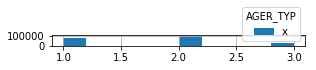

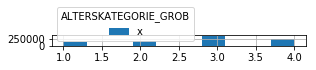

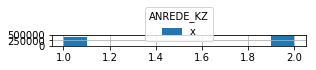

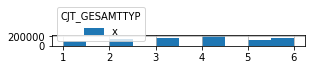

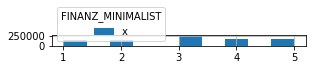

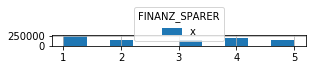

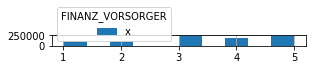

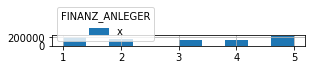

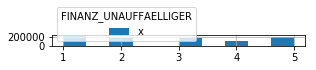

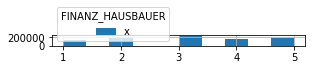

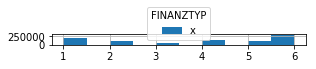

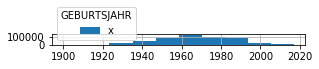

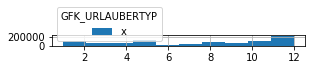

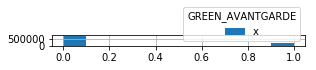

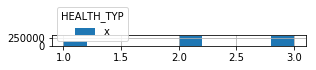

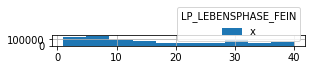

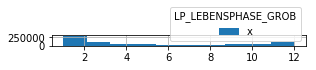

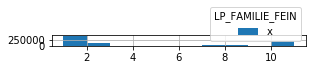

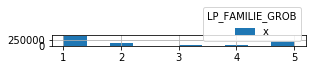

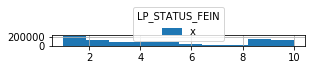

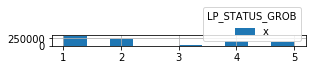

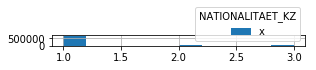

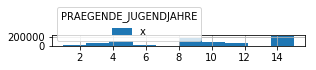

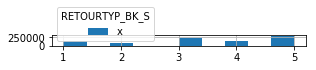

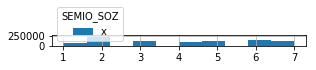

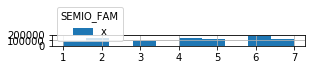

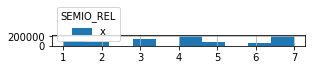

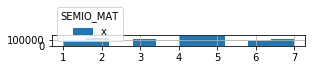

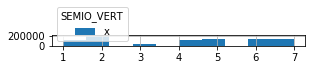

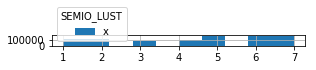

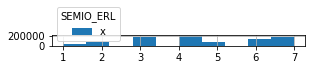

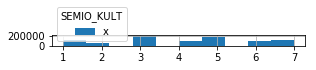

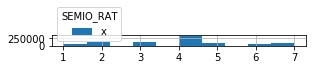

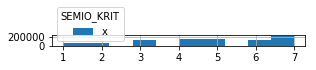

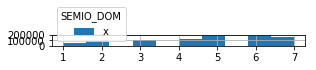

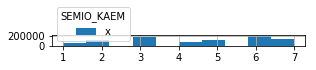

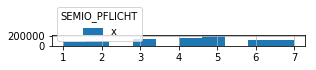

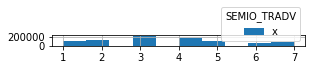

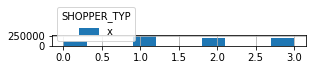

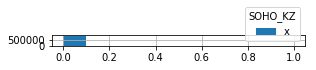

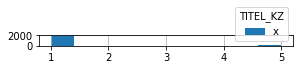

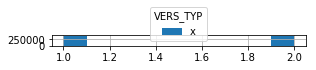

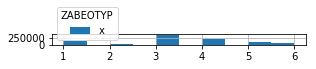

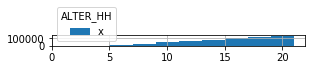

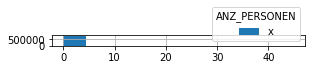

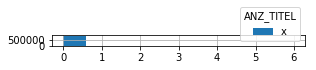

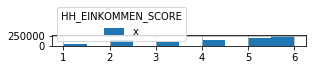

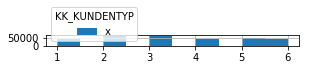

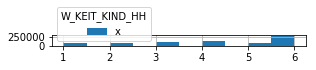

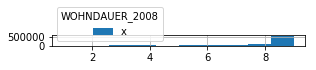

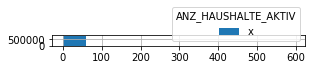

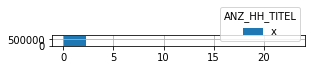

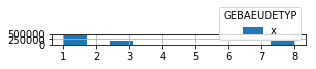

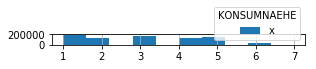

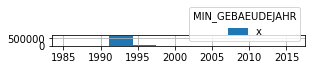

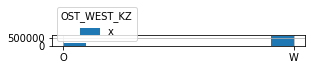

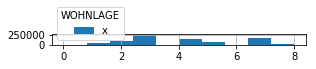

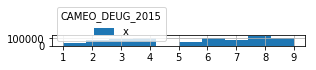

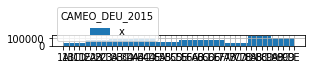

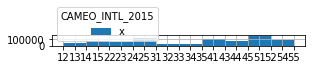

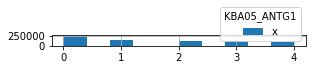

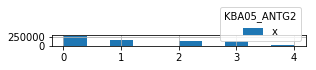

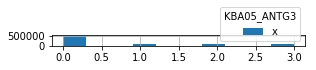

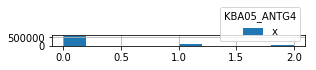

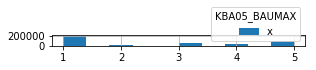

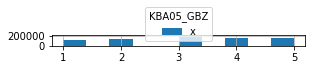

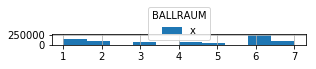

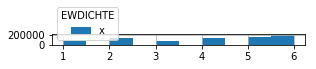

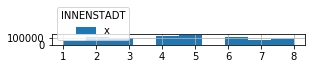

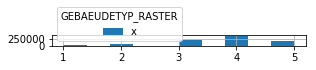

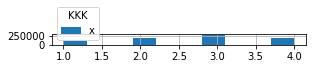

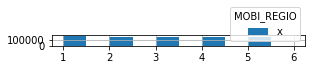

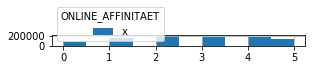

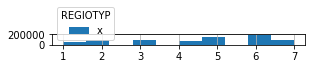

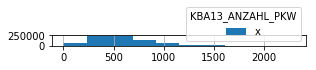

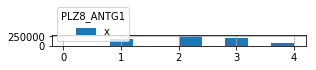

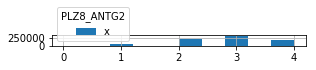

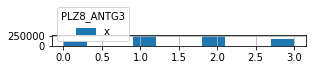

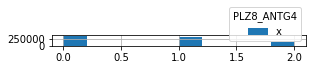

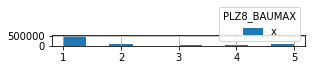

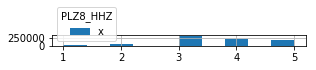

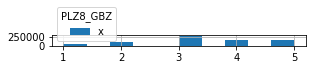

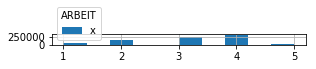

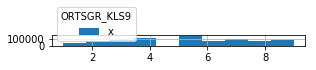

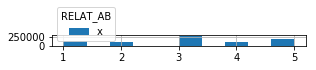

In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

for i in range(0, azdias.shape[1]):
    plt.figure(figsize=(10, 10))
    plt.subplot(43, 2, i+1)
    azdias[azdias.columns[i]].hist()
    plt.legend(['x','y'], title = azdias.columns[i])

    

In [14]:
df_outliers = pd.DataFrame(azdias.isna().sum()>200000)
df_outliers[df_outliers[0]==True].index
#Adding these columns to dellist below

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

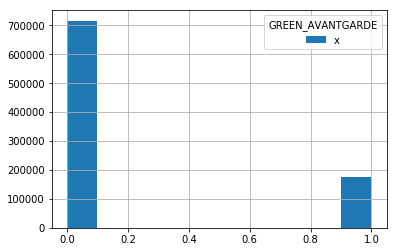

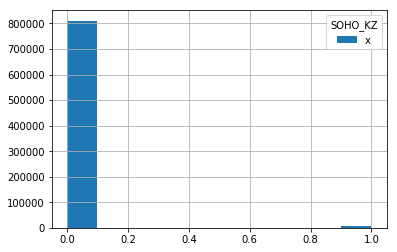

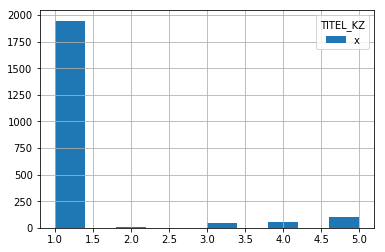

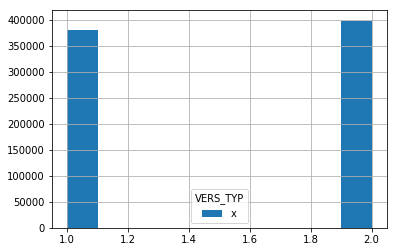

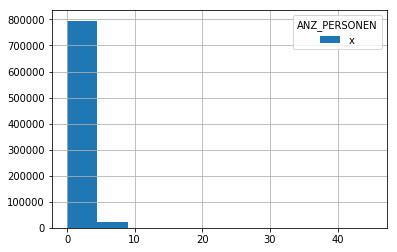

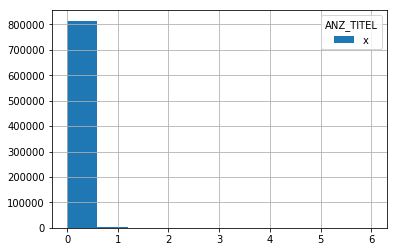

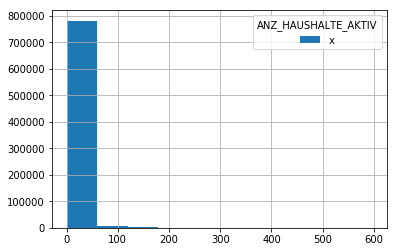

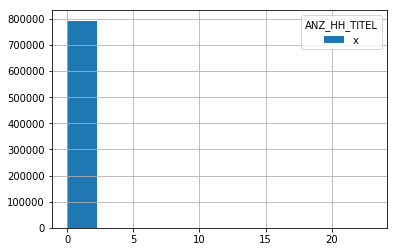

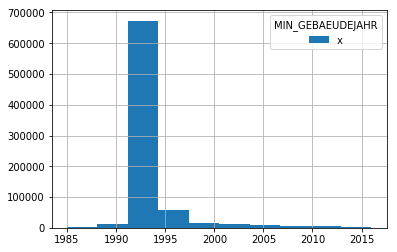

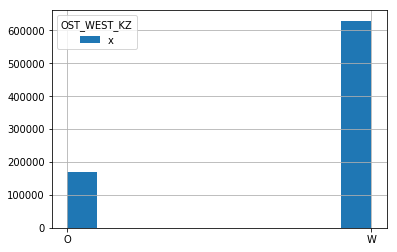

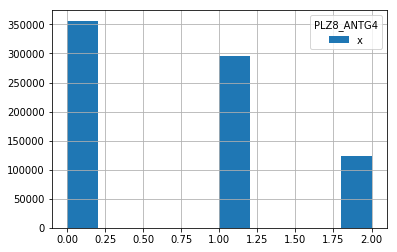

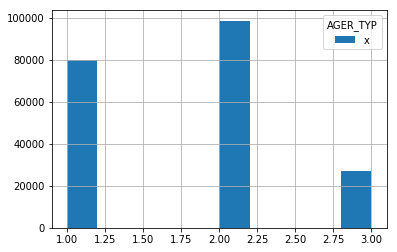

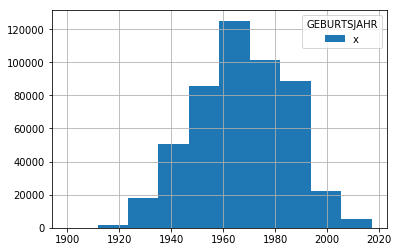

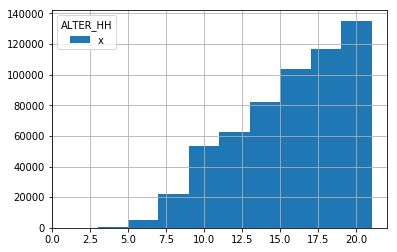

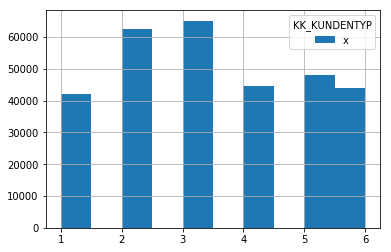

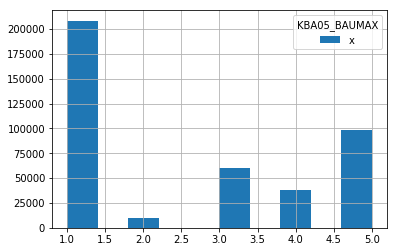

In [15]:
# Investigate patterns in the amount of missing data in each column.
dellist = ["GREEN_AVANTGARDE", "SOHO_KZ", "TITEL_KZ", "VERS_TYP", "ANZ_PERSONEN","ANZ_TITEL", "ANZ_HAUSHALTE_AKTIV", "ANZ_HH_TITEL", "MIN_GEBAEUDEJAHR", "OST_WEST_KZ", "PLZ8_ANTG4", "AGER_TYP", "GEBURTSJAHR", "ALTER_HH", "KK_KUNDENTYP",
       "KBA05_BAUMAX"]

for delitem in dellist:
    azdias[delitem].hist()
    plt.legend(['x','y'], title = delitem)
    plt.show()

In [16]:
for delitem in dellist:
    print(azdias[delitem].describe())
    print("na item count --------- {} ".format(azdias[delitem].isna().sum()))
    print("na count ratio -------- {} ".format(azdias[delitem].isna().sum()/azdias.shape[0]))

count    891221.000000
mean          0.196612
std           0.397437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: GREEN_AVANTGARDE, dtype: float64
na item count --------- 0 
na count ratio -------- 0.0 
count    817722.000000
mean          0.008423
std           0.091392
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SOHO_KZ, dtype: float64
na item count --------- 73499 
na count ratio -------- 0.08247000463409188 
count    2160.000000
mean        1.318519
std         0.999504
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: TITEL_KZ, dtype: float64
na item count --------- 889061 
na count ratio -------- 0.9975763587258379 
count    780025.000000
mean          1.511166
std           0.499876
min           1.000000
25%           1.000000
50%           2.000000
75%           2.00

In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
def remove_dellist(dellist, data):
    for delitem in dellist:
        data = data.drop(delitem, axis = 1)
        
    
    print(dellist)
    data.columns
    return data

In [18]:
azdias.shape

(891221, 85)

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

Removed columns

['GREEN_AVANTGARDE', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'PLZ8_ANTG4']

>GREEN_AVANTGARDE --- either 0 or 1 of value and 80% of data are nan

>SOHO_KZ ---- either 0 or 1 and 1 value data is so small and trivial mosly 0 = NO

> TITEL_KZ --- na count ratio 99.75%

> VERS_TYP --- either 1 or 2 of data nothing too significant

> ANZ_PERSONEN --- most of the data 75% of data are concentrated within 2 and have outlier of max data as high as 45

> ANZ_TITEL ---na count ratio 99.64%

> ANZ_HAUSHALTE_AKTIV --- 75 % of data stays within 10 but there is an outlier max data as high as 595, not representing population nor misleading

> ANZ_HH_TITEL --- 75% of data syas within 1 but there is an outlier max data as high as 23, again misleading

> MIN_GEBAEUDEJAHR --- 25% - 75% of data are within 1992 to 1993 others are outliers

> OST_WEST_KZ --- most data are WEST

> PLZ8_ANTG4 --- most data are 1

> AGER_TYP na count ratio 77% 

> GEBURTSJAHR na count ratio 44%

> ALTER_HH na count ratio 35%

> KK_KUNDENTYP  na count ratio 66%

> KBA05_BAUMAX na count ratio 53%

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [19]:
# How much data is missing in each row of the dataset?
print(azdias.shape)
df_nanumber = (azdias.isna().sum()/azdias.shape[0])*100

# above 34% na datas  
df_naabove34 = df_nanumber > 34

# drop list for the above 34% na data columns ---- accessing from the na count ratio above cell
drop_list = df_naabove34[df_naabove34 == True].index
undrop_list = df_naabove34[df_naabove34 == False].index

print(drop_list)
undrop_list

(891221, 85)
Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')


Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

In [20]:
def undrop_list_index(data):
    undrop_index = []
    dfnanumber = (data.isna().sum()/data.shape[0])*100
    
    dfnaabove34 = dfnanumber>34
    undroplist = dfnaabove34[dfnaabove34 == False].index
    
    for items in undrop_list:
        undrop_index.append(data.columns.get_loc(items))
        
    return undrop_index

def drop_list_index(data):
    drop_index = []
    dfnanumber = (data.isna().sum()/data.shape[0])*100
    
    dfnaabove34 = dfnanumber >= 34
    droplist = dfnaabove34[dfnaabove34 == True].index
    
    for items in drop_list:
        drop_index.append(data.columns.get_loc(items))
        
    return drop_index
    

In [21]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
drop_index = drop_list_index(azdias)


In [22]:
print(drop_index)
for dindex in drop_index:
    print(azdias.columns[dindex])

[0, 11, 40, 43, 47, 64]
AGER_TYP
GEBURTSJAHR
TITEL_KZ
ALTER_HH
KK_KUNDENTYP
KBA05_BAUMAX


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe460127b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe45f66a978>]], dtype=object)

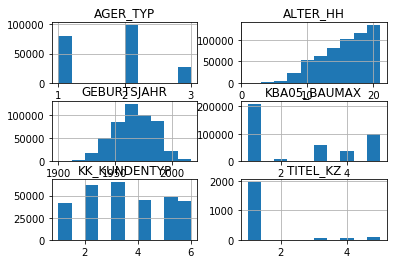

In [23]:
drop_df = azdias.iloc[:, drop_index]
drop_df

drop_df.hist()

In [24]:
undrop_index = undrop_list_index(azdias)
print(azdias.iloc[:, undrop_index].isna().sum().sort_values(ascending = False).head(5))

print(azdias.iloc[:, undrop_index].isna().sum().sort_values(ascending = False).tail(5))



KKK               158064
REGIOTYP          158064
W_KEIT_KIND_HH    147988
MOBI_REGIO        133324
KBA05_ANTG4       133324
dtype: int64
SEMIO_LUST    0
SEMIO_VERT    0
SEMIO_MAT     0
SEMIO_REL     0
ZABEOTYP      0
dtype: int64


In [25]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

import seaborn as sb

def show_counterplot_diff(col, data1,data2, data3):
    fig, ax = plt.subplots(1, 3)

    sb.countplot(data = data1, x= col, ax = ax[0])
    sb.countplot(data = data2, x= col, ax = ax[1])
    sb.countplot(data = data3, x = col, ax = ax[2])
    ax[0].set_title("less missing")
    ax[1].set_title("more missing")
    ax[2].set_title("whole")
    fig.tight_layout()
    fig.show()


In [26]:
# GREEN_AVANTGARDE is the missing high part of data na high
print(azdias['GREEN_AVANTGARDE'].iloc[0:100].mean()) #average
print(azdias['GREEN_AVANTGARDE'].iloc[300:400].sum()/100) # less missing
print(azdias['GREEN_AVANTGARDE'].iloc[500:600].sum()/100) # more missing

0.24
0.27
0.1


In [27]:
# na data low segment 
print(azdias['KKK'].mean())
print(azdias['KKK'].iloc[600:700].sum()/100)
print(azdias['KKK'].iloc[500:600].sum()/100)

2.72338394096
2.26
1.84


In [28]:
# missing low data
print(azdias['MOBI_REGIO'].mean())
print(azdias['MOBI_REGIO'].iloc[1200:1300].sum()/100)
print(azdias['MOBI_REGIO'].iloc[2200:2300].sum()/100)

2.96353990054
2.22
1.96


In [29]:
# HIGH na GROUPS
print(azdias['KK_KUNDENTYP'].mean())
print(azdias['KK_KUNDENTYP'].iloc[500:600].sum()/100)
print(azdias['KK_KUNDENTYP'].iloc[1300:1400].sum()/100)

3.4106402617
0.98
1.07


In [30]:
# HIGH na GROUPS
print(azdias['ALTER_HH'].mean())
print(azdias['ALTER_HH'].iloc[500:600].sum()/100)
print(azdias['ALTER_HH'].iloc[3000:3100].sum()/100)

15.2918045146
8.26
10.25


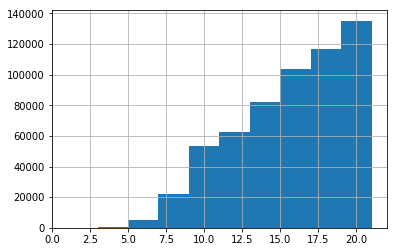

In [31]:
azdias['ALTER_HH'].hist()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


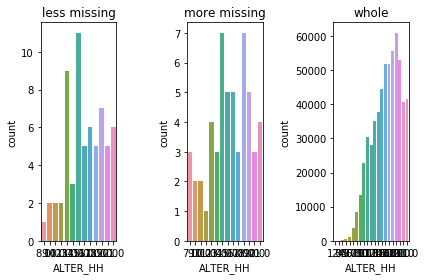

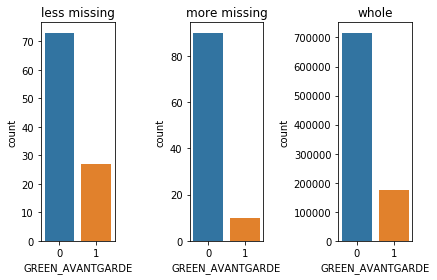

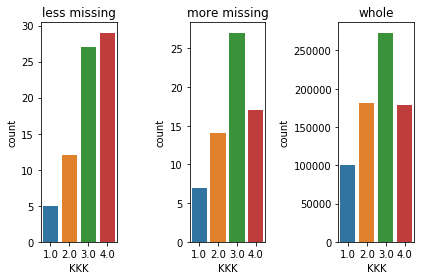

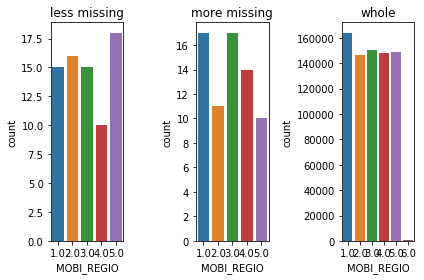

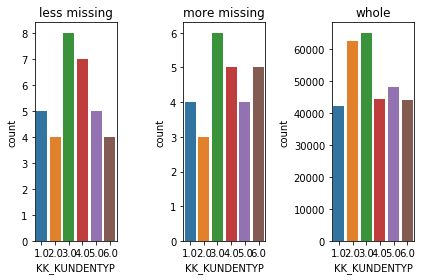

In [32]:
# high na
show_counterplot_diff('ALTER_HH', azdias.iloc[3000:3100],azdias.iloc[500:600],azdias) # closer to none
# high na
show_counterplot_diff('GREEN_AVANTGARDE', azdias.iloc[300:400],azdias.iloc[500:600],azdias) # closer to less missing
# low na
show_counterplot_diff('KKK', azdias.iloc[600:700],azdias.iloc[500:600],azdias) # closer to more missing
# low na
show_counterplot_diff('MOBI_REGIO', azdias.iloc[1200:1300],azdias.iloc[2200:2300],azdias) # closer to more missing
# high na
show_counterplot_diff('KK_KUNDENTYP', azdias.iloc[200:300],azdias.iloc[500:600],azdias) # close to none


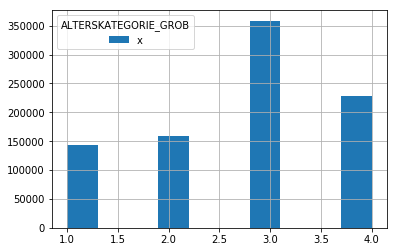

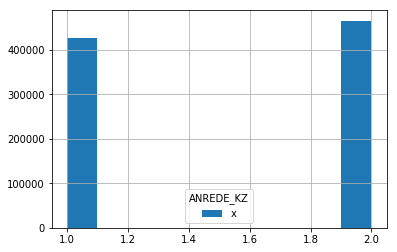

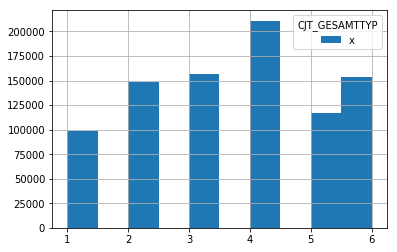

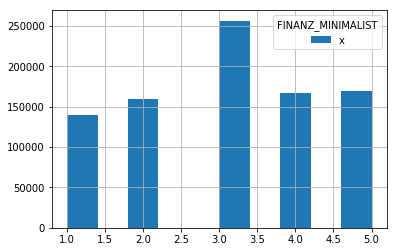

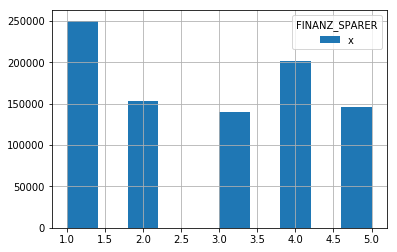

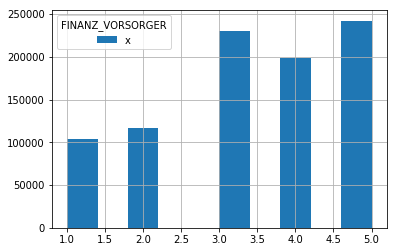

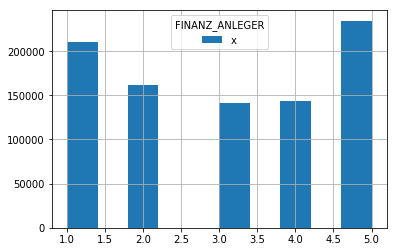

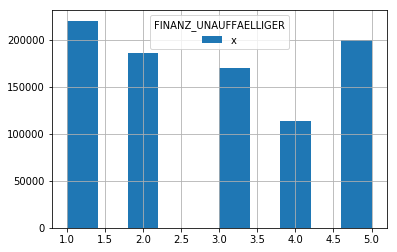

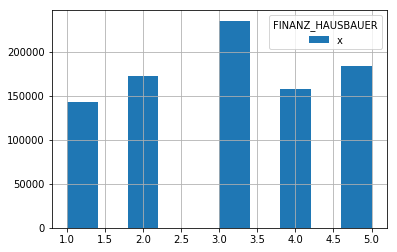

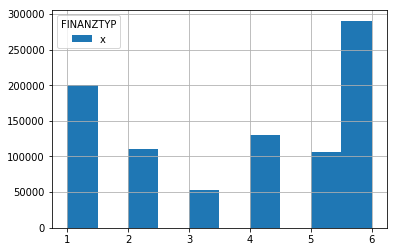

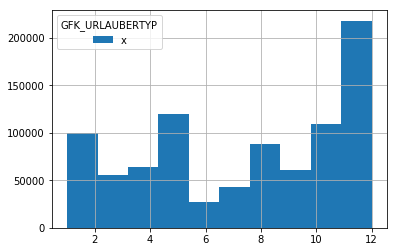

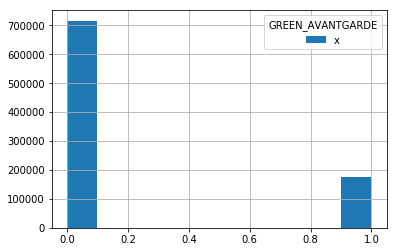

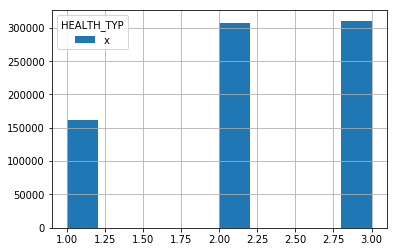

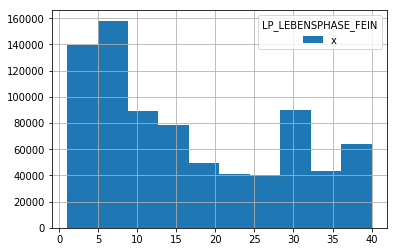

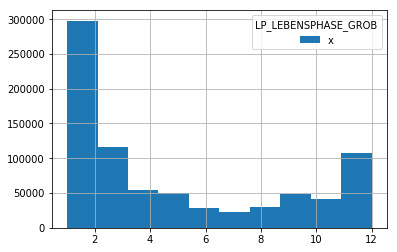

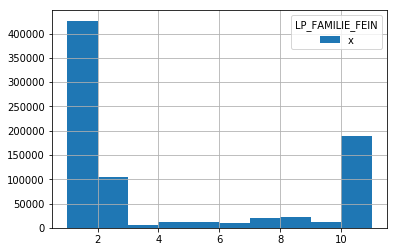

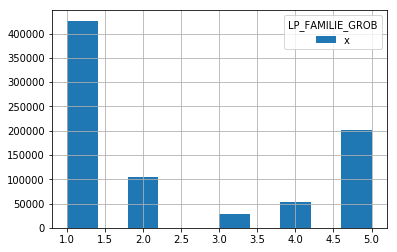

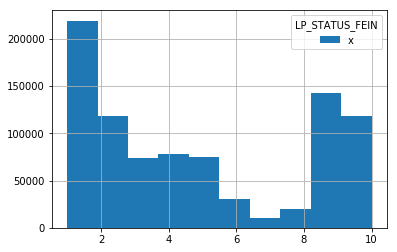

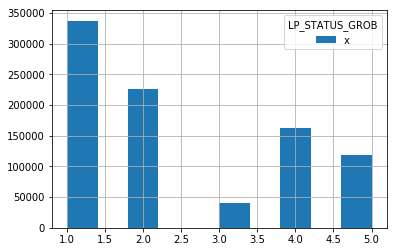

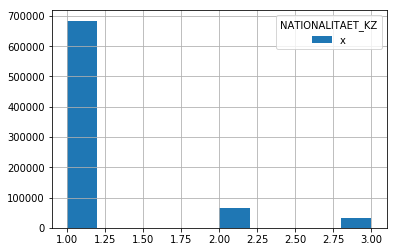

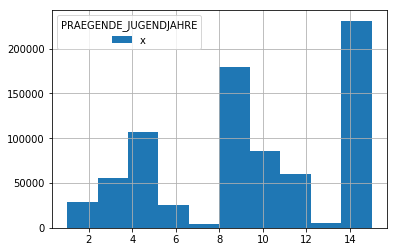

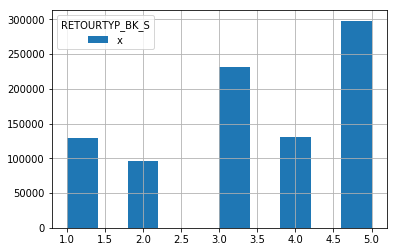

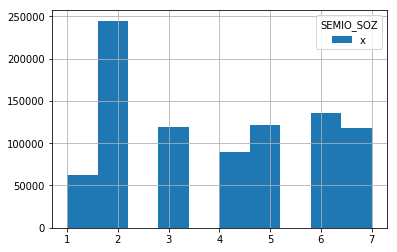

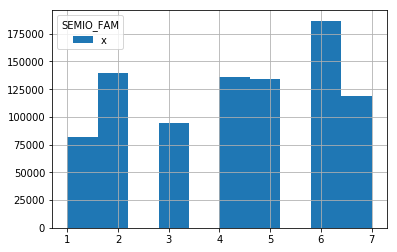

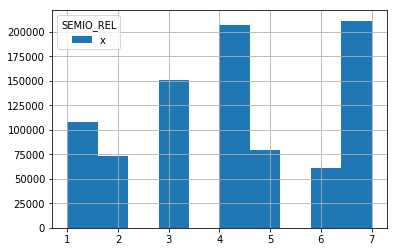

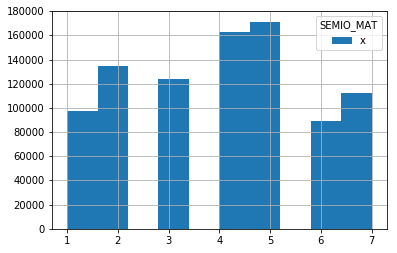

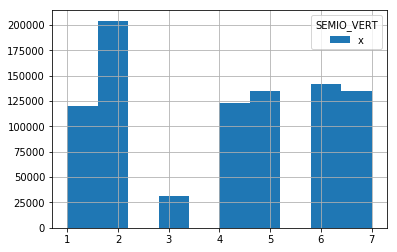

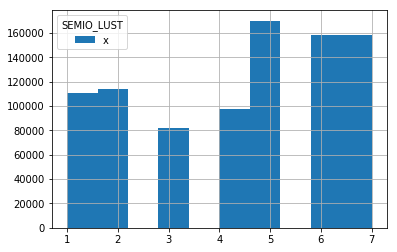

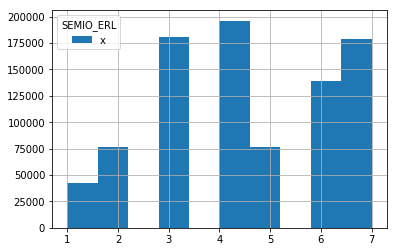

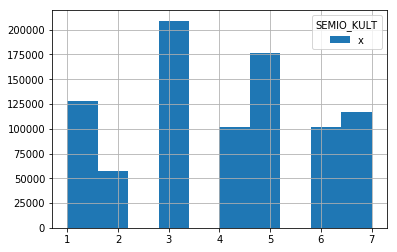

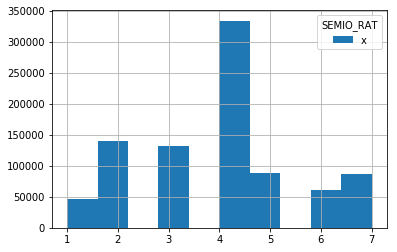

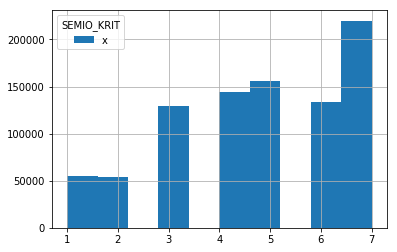

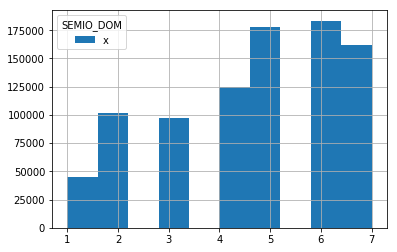

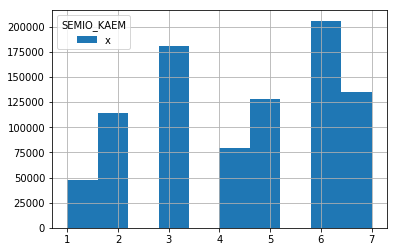

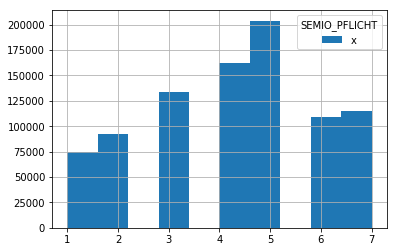

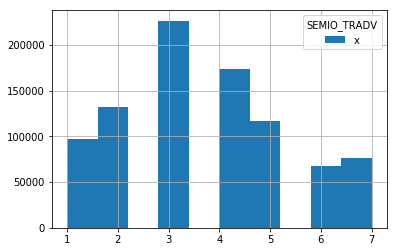

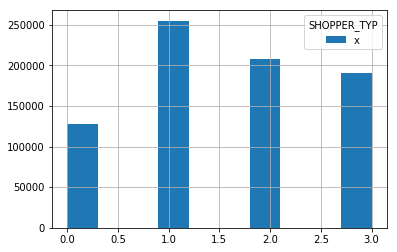

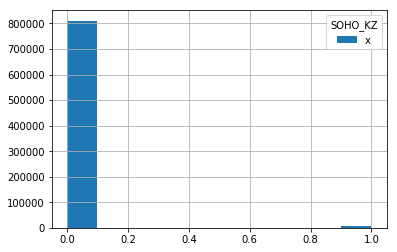

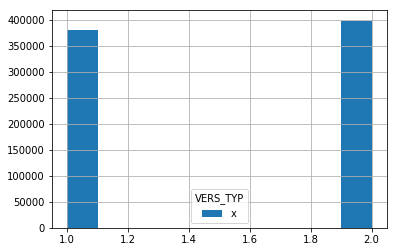

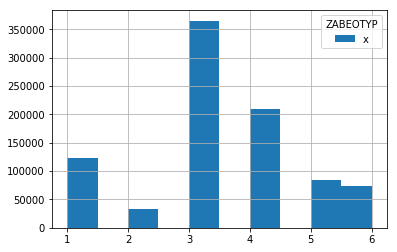

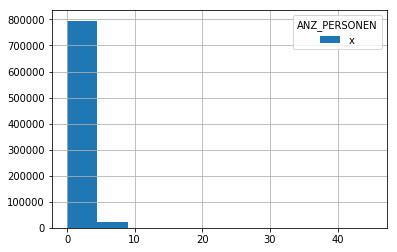

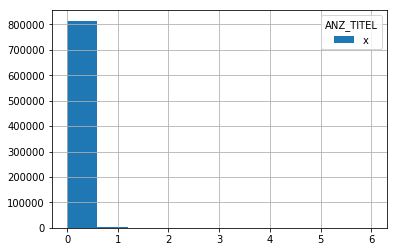

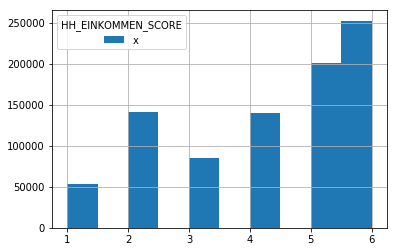

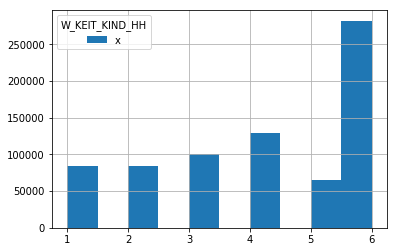

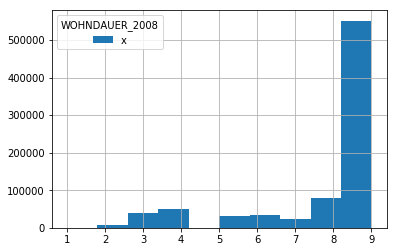

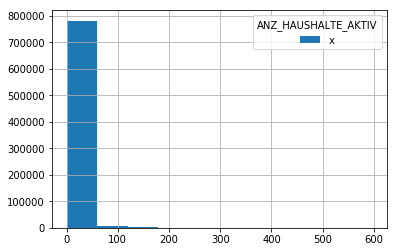

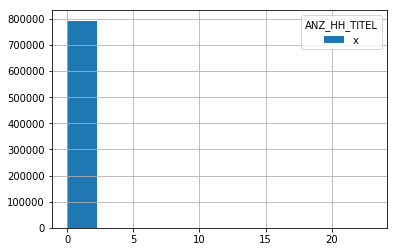

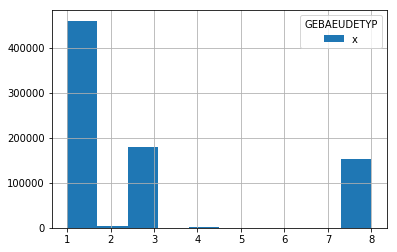

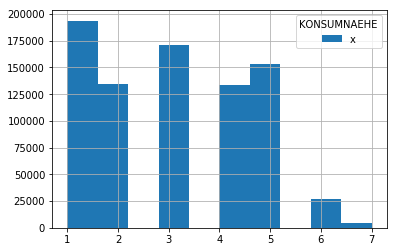

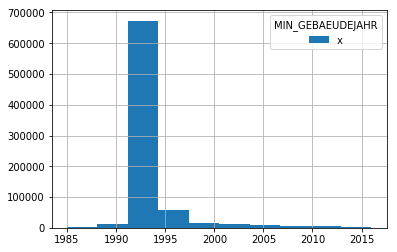

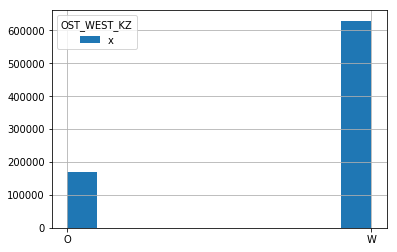

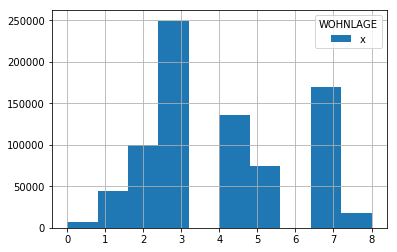

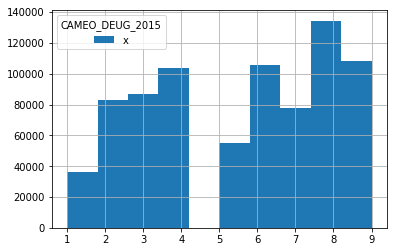

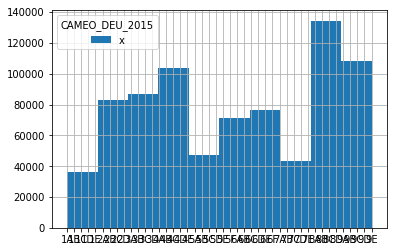

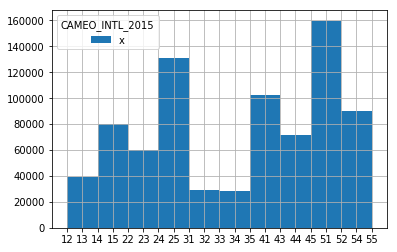

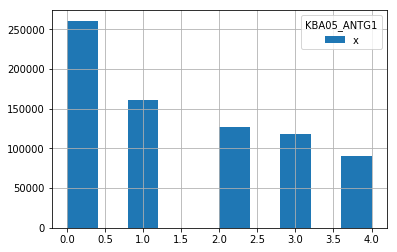

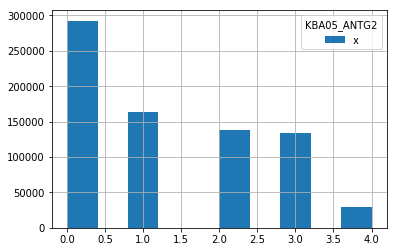

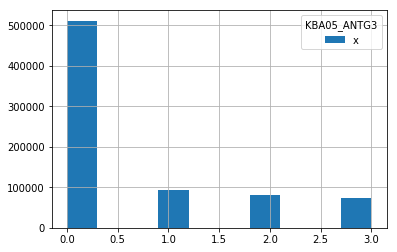

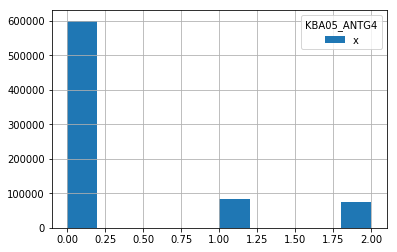

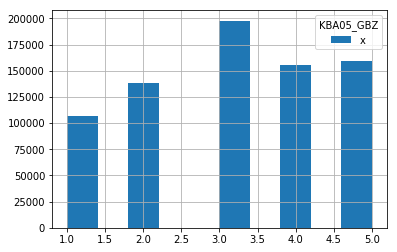

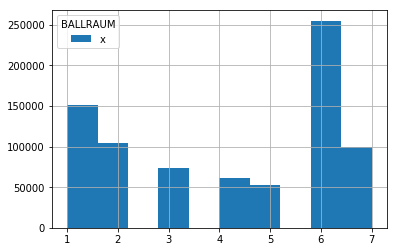

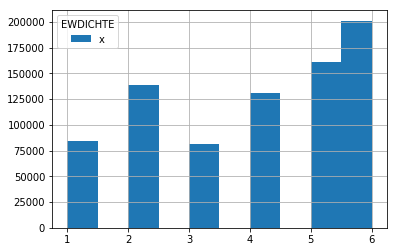

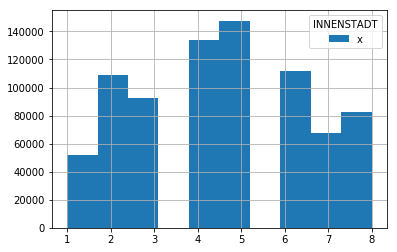

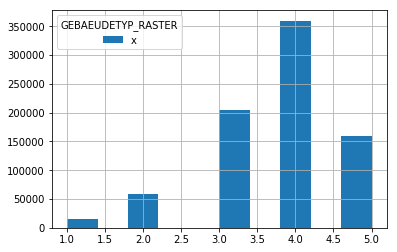

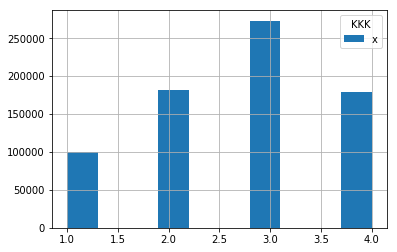

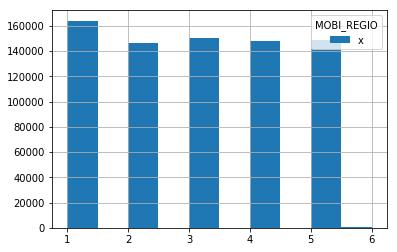

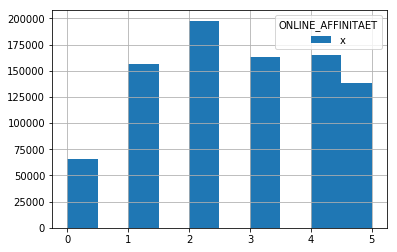

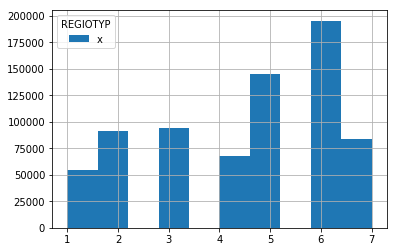

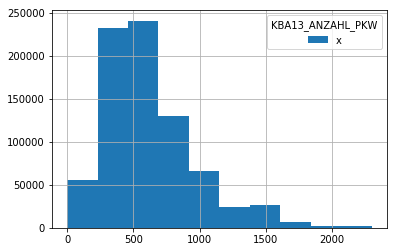

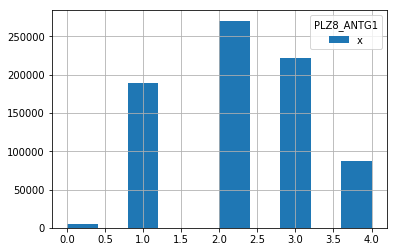

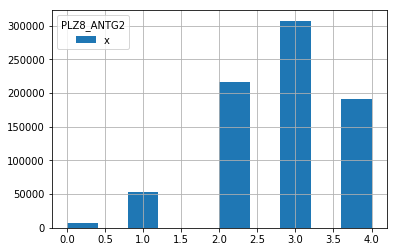

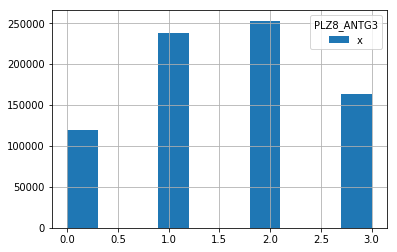

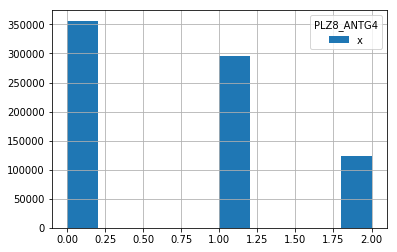

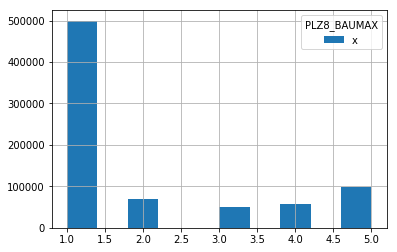

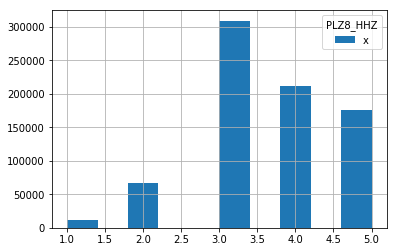

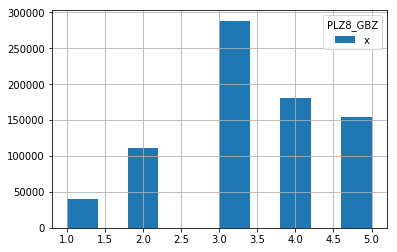

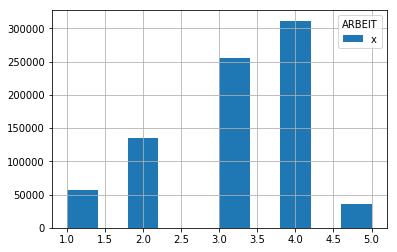

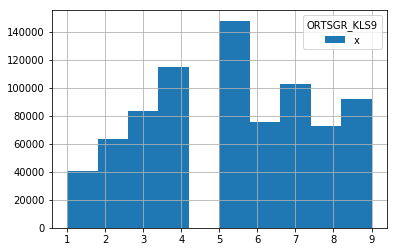

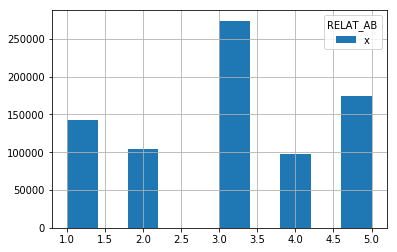

In [33]:

undrop_index = undrop_list_index(azdias)
    
undrop_df = azdias.iloc[:, undrop_index] 
undrop_df


for und in undrop_df.columns:
    undrop_df[und].hist()
    plt.legend(['x','y'], title = und)
    plt.show()


#### Discussion 1.1.3: Assess Missing Data in Each Row

Missing data more than 34% are:-

'AGER_TYP'
'GEBURTSJAHR'
'TITEL_KZ'
'ALTER_HH'
'KK_KUNDENTYP'
'KBA05_BAUMAX'

All data shown are highly concentrated on small range and far scarce, therefore it may mean only 1 thing or 2 perhaps in big picture, either YES or NO, perhaps


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [34]:
# How many features are there of each data type?

print(undrop_df.dtypes.describe())
df_dtype = undrop_df.dtypes
print(df_dtype[df_dtype == 'float64'].count())
print(df_dtype[df_dtype == 'int64'].count())
print(df_dtype[df_dtype == 'object'].count())

count          79
unique          3
top       float64
freq           51
dtype: object
51
24
4


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [35]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
obj_data = []
for items in undrop_df.dtypes[undrop_df.dtypes == 'object'].index:
    obj_data.append(undrop_df.columns.get_loc(items))
    
undrop_df.iloc[:, obj_data]

,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015
0,NaN,NaN,NaN,NaN
1,W,8,8A,51
2,W,4,4C,24
3,W,2,2A,12
4,W,6,6B,43
5,W,8,8C,54
6,W,4,4A,22
7,W,2,2D,14
8,W,1,1A,13
9,W,1,1E,15


In [36]:
# Re-encode categorical variable(s) to be kept in the analysis

print(undrop_df.shape)

def new_cameo_deu(data):

    cat1 = data['CAMEO_DEU_2015'].drop_duplicates().sort_values()

    dict1 = {list(cat1)[i]: (i+1) for i in range(0, len(cat1))}
    print(dict1)

    data['new_CAMEO_DEU_2015'] = data['CAMEO_DEU_2015'].apply(lambda x: dict1.get(x))

    data = data.drop('CAMEO_DEU_2015', axis = 1)
    return data


(891221, 79)


In [37]:
undrop_df = new_cameo_deu(undrop_df)

undrop_df.shape

# should be (891221, 70)

{'1A': 1, '1B': 2, '1C': 3, '1D': 4, '1E': 5, '2A': 6, '2B': 7, '2C': 8, '2D': 9, '3A': 10, '3B': 11, '3C': 12, '3D': 13, '4A': 14, '4B': 15, '4C': 16, '4D': 17, '4E': 18, '5A': 19, '5B': 20, '5C': 21, '5D': 22, '5E': 23, '5F': 24, '6A': 25, '6B': 26, '6C': 27, '6D': 28, '6E': 29, '6F': 30, '7A': 31, '7B': 32, '7C': 33, '7D': 34, '7E': 35, '8A': 36, '8B': 37, '8C': 38, '8D': 39, '9A': 40, '9B': 41, '9C': 42, '9D': 43, '9E': 44, nan: 45}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(891221, 79)

In [38]:
undrop_df.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

#### Discussion 1.2.1: Re-Encode Categorical Features

Kept
CAMEO_DEU_2015 been dropped, replaced by new_CAMEO_DEU_2015 with numerical entries corresponding to the key values originally entered --- in this way I can refer back to the category of peopke if I am interested later

Dropped are-

Below are list of being dropped as I did not find it too relevant, ineresting nor too useful (not enough population in data)

'GREEN_AVANTGARDE' -- only yes or no value and too far between mostly na data
 'SOHO_KZ     -- not too sure if this is relevant
 'TITEL_KZ' 
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'PLZ8_ANTG4'

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [39]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
def youth_era(uncleaned_df):
    uncleaned_df['youth_40s'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(1, 3) else 0)
    uncleaned_df['youth_50s'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(3, 5) else 0)
    uncleaned_df['youth_60s'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(5, 8) else 0)
    uncleaned_df['youth_70s']  = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(8, 10) else 0)
    uncleaned_df['youth_80s']  = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(10, 14) else 0)
    uncleaned_df['youth_90s'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in range(14, 16) else 0)
    
    cleaned_df = uncleaned_df
    
    return cleaned_df

In [40]:
def youth_ew_culture(uncleaned_df):
    lindex = []
    lvalue = []
    for i in range(1, 16):
        lindex.append(i)
        if i in (6, 10, 11):
            lvalue.append("W")
        elif i in (7, 12, 13):
            lvalue.append("E")
        else:
            lvalue.append("EW")
        
    print(lindex)
    print(lvalue)

    dictew = dict(zip(lindex, lvalue))
    print(dictew)

    #youth_EW = 1 if E+W else 0
    uncleaned_df['youth_EW'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if dictew.get(x) == 'EW' else 0)
    print(uncleaned_df['youth_EW'])

    uncleaned_df['youth_E'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if dictew.get(x)=='E' else 0)
    print(uncleaned_df['youth_E'])

    uncleaned_df['youth_W'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if dictew.get(x)=='W' else 0)
    print(uncleaned_df['youth_W'])

    lindex2 = []
    lvalue2 = []
    for ii in range(1, 16):
        lindex.append(ii)
        if ii in (1, 3, 5, 8, 10, 12, 14):
            lvalue.append("Main")
        else:
            lvalue.append("AvanG")
        
    dictma = dict(zip(lindex2, lvalue2))

    #youth_main_avantg 1 ==> main 0 ==> avantgarde
    uncleaned_df['youth_main_avantg'] = uncleaned_df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if dictma.get(x)=='Main' else 0)
    print(uncleaned_df['youth_main_avantg'])
    uncleaned_df = uncleaned_df.drop('PRAEGENDE_JUGENDJAHRE', axis = 1)
    
    cleaned_df = uncleaned_df
    return cleaned_df

In [41]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
def CAMEO_INTL1(uncleaned_df):
    #hhd_wealthy =1 
    uncleaned_df['hhd_wealthy'] = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x: 1 if x in range(11, 16) else 0)
    #hhd_prosperous = 1
    uncleaned_df['hhd_prosperous'] = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x: 1 if x in range(21, 26) else 0)
    uncleaned_df['hhd_comfortable'] = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x:1 if x in range(31, 36) else 0)
    uncleaned_df['hhd_l_affluent'] = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x: 1 if x in range(41, 46) else 0)
    uncleaned_df['hhd_poorer'] = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x: 1 if x in range(51, 56) else 0)
    cleaned_df = uncleaned_df
    return cleaned_df

In [42]:
def CAMEO_INTL2(uncleaned_df):
    df_lastdigit = uncleaned_df['CAMEO_INTL_2015'].apply(lambda x:  int(x.__str__()[-1]) if x.__str__()[-1] != 'n' else 0)
    uncleaned_df['prefamily_singles'] = df_lastdigit.apply(lambda x: 1 if x == 1 else 0)
    uncleaned_df['young_children'] = df_lastdigit.apply(lambda x: 1 if x == 2 else 0)
    uncleaned_df['family_school_age']  = df_lastdigit.apply(lambda x: 1 if x == 3 else 0)
    uncleaned_df['older_fam_mature_couples']  = df_lastdigit.apply(lambda x: 1 if x == 4 else 0)
    uncleaned_df['retired']  = df_lastdigit.apply(lambda x: 1 if x == 5 else 0)
    uncleaned_df['family_status_unknown']  = df_lastdigit.apply(lambda x: 1 if x == 0 else 0)
    
    uncleaned_df = uncleaned_df.drop('CAMEO_INTL_2015', axis = 1)
    
    cleaned_df = uncleaned_df
    return cleaned_df

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

CAMEO_INTL_2015 and PRAEGENDE_JUGENDJAHRE are re-engineered to new columns with easy recognisable names (at least) and dropped of original columns convulated of values

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [43]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
#lifestage_single = 1 family = 0
def lifestage(df):
    df['lifestage_single'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x:  1 if x in range(1, 8) else 0)
    lindex3= []
    lvalue3= []
    lvalue4=[]
    lvalue5 = []

    for j in range(1, 13):
        lindex3.append(j)
        if j in (1, 2, 3, 7):
            lvalue3.append('single')
        elif j in (4, 5):
            lvalue3.append('couple')
        elif j == 6:
            lvalue3.append('single parent')
        else:
            lvalue3.append('family')
    
        if j in (1, 2, 4, 7, 9, 10):
            lvalue4.append('LA income')
        elif j == 6:
            lvalue4.append('unknown')
        else:
            lvalue4.append('higher income')
        
        if j in (1, 9, 11):
            lvalue5.append('younger age')
        elif j in (2, 10, 12):
            lvalue5.append('higher age')
        else:
            lvalue5.append('age unknown')
        
    dictfamily = dict(zip(lindex3, lvalue3))
    dictincome = dict(zip(lindex3, lvalue4))
    dictage = dict(zip(lindex3, lvalue5))

    df['lifestage_single'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictfamily.get(x) == "single" else 0)
    df['lifestage_couple'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictfamily.get(x) == "couple" else 0)
    df['lifestage_single_p'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictfamily.get(x) == "single parent" else 0)
    df['lifestage_family'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictfamily.get(x) == "family" else 0)

    df['lifestage_la_$'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictincome.get(x) == "LA income" else 0)
    df['lifestage_na_$'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictincome.get(x) == "unknown" else 0)
    df['lifestage_higher_$'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictincome.get(x) == "hiugher income" else 0)

    df['lifestage_younger'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictage.get(x) == "younger age" else 0)
    df['lifestage_older'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictage.get(x) == "higher age" else 0)
    df['lifestage_age_na'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: 1 if dictage.get(x) == "age unknown" else 0)

    df = df.drop('LP_LEBENSPHASE_GROB', axis = 1)
    
    return df

In [44]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [45]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    #df_azdias = nan_convert(azdias)
    
    # remove selected columns and rows, ...
    #for delitem in dellist:
     #   df_azdias = df_azdias.drop(delitem, axis = 1)
    
    
    # select, re-encode, and engineer column values.
    #leaned_df = CAMEO_DEU_CLEAN(undrop_df)
    cleaned_df = df
    cleaned2_df = youth_era(cleaned_df)
    cleaned3_df = youth_ew_culture(cleaned2_df)
    cleaned4_df = CAMEO_INTL1(cleaned3_df)
    cleaned5_df = CAMEO_INTL2(cleaned4_df)
    cleaned6_df = lifestage(cleaned5_df)

    
    # Return the cleaned dataframe.b
    return cleaned6_df
    

In [46]:
print(undrop_df.shape)
df_clean = clean_data(undrop_df)
print(df_clean.shape)
df_clean.columns

(891221, 79)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['EW', 'EW', 'EW', 'EW', 'EW', 'W', 'E', 'EW', 'EW', 'W', 'W', 'E', 'E', 'EW', 'EW']
{1: 'EW', 2: 'EW', 3: 'EW', 4: 'EW', 5: 'EW', 6: 'W', 7: 'E', 8: 'EW', 9: 'EW', 10: 'W', 11: 'W', 12: 'E', 13: 'E', 14: 'EW', 15: 'EW'}
0         0
1         1
2         1
3         1
4         1
5         1
6         0
7         1
8         0
9         1
10        1
11        0
12        1
13        1
14        0
15        1
16        1
17        0
18        0
19        1
20        0
21        0
22        1
23        1
24        0
25        1
26        1
27        0
28        0
29        0
         ..
891191    1
891192    1
891193    1
891194    0
891195    1
891196    1
891197    0
891198    1
891199    0
891200    1
891201    0
891202    0
891203    0
891204    0
891205    1
891206    1
891207    1
891208    1
891209    1
891210    1
891211    1
891212    1
891213    0
891214    1
891215    0
891216    1
891217    0
891218    1
891219

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP',
       ...
       'lifestage_single', 'lifestage_couple', 'lifestage_single_p',
       'lifestage_family', 'lifestage_la_$', 'lifestage_na_$',
       'lifestage_higher_$', 'lifestage_younger', 'lifestage_older',
       'lifestage_age_na'],
      dtype='object', length=107)

In [47]:
list(df_clean.columns)

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'IN

In [48]:
# removing _FEIN fine data as roughly same verison of _GLOB available + OST_WEST_KZ
def del_fein(data):
    dl_list = ['LP_LEBENSPHASE_FEIN','LP_FAMILIE_FEIN', 'LP_STATUS_FEIN','OST_WEST_KZ']
    for dl in dl_list:
        data = data.drop(dl, axis=1)
    return data

In [49]:
df_clean = del_fein(df_clean)
list(df_clean.columns)

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_FAMILIE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',


In [51]:
undrop_df.notna().sum()

df_clean.notna().sum()

ALTERSKATEGORIE_GROB        888340
ANREDE_KZ                   891221
CJT_GESAMTTYP               886367
FINANZ_MINIMALIST           891221
FINANZ_SPARER               891221
FINANZ_VORSORGER            891221
FINANZ_ANLEGER              891221
FINANZ_UNAUFFAELLIGER       891221
FINANZ_HAUSBAUER            891221
FINANZTYP                   891221
GFK_URLAUBERTYP             886367
GREEN_AVANTGARDE            891221
HEALTH_TYP                  780025
LP_FAMILIE_GROB             813429
LP_STATUS_GROB              886367
NATIONALITAET_KZ            782906
RETOURTYP_BK_S              886367
SEMIO_SOZ                   891221
SEMIO_FAM                   891221
SEMIO_REL                   891221
SEMIO_MAT                   891221
SEMIO_VERT                  891221
SEMIO_LUST                  891221
SEMIO_ERL                   891221
SEMIO_KULT                  891221
SEMIO_RAT                   891221
SEMIO_KRIT                  891221
SEMIO_DOM                   891221
SEMIO_KAEM          

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [53]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# na data columns... these should be under 40% mostly around 10% or lower
# I think I can use inmputer with median() without skewing data too much
from sklearn.preprocessing import Imputer

print(df_clean.isna().sum()[df_clean.isna().sum()>0])
df_nanumber[df_nanumber < 40][df_nanumber > 0]
simputer = Imputer(missing_values=np.nan, strategy='most_frequent')
simputer.fit(df_clean)
Imputer()
df_cleaned = simputer.transform(df_clean)

ALTERSKATEGORIE_GROB      2881
CJT_GESAMTTYP             4854
GFK_URLAUBERTYP           4854
HEALTH_TYP              111196
LP_FAMILIE_GROB          77792
LP_STATUS_GROB            4854
NATIONALITAET_KZ        108315
RETOURTYP_BK_S            4854
SHOPPER_TYP             111196
SOHO_KZ                  73499
VERS_TYP                111196
ANZ_PERSONEN             73499
ANZ_TITEL                73499
HH_EINKOMMEN_SCORE       18348
W_KEIT_KIND_HH          147988
WOHNDAUER_2008           73499
ANZ_HAUSHALTE_AKTIV      99611
ANZ_HH_TITEL             97008
GEBAEUDETYP              93148
KONSUMNAEHE              73969
MIN_GEBAEUDEJAHR         93148
WOHNLAGE                 93148
CAMEO_DEUG_2015          99352
KBA05_ANTG1             133324
KBA05_ANTG2             133324
KBA05_ANTG3             133324
KBA05_ANTG4             133324
KBA05_GBZ               133324
BALLRAUM                 93740
EWDICHTE                 93740
INNENSTADT               93740
GEBAEUDETYP_RASTER       93155
KKK     

In [54]:
df_cleaned.shape
pd.DataFrame(df_cleaned).notna().sum()[pd.DataFrame(df_cleaned).notna().sum()<891221]
#There are no na data for df_cleaned

Series([], dtype: int64)

In [55]:
print(list(pd.DataFrame(df_cleaned).columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [127]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
#df_cleaned = scaler.fit_transform(df_cleaned)
#df_cleaned.shape

scaler_fit = scaler.fit(df_cleaned)
scaler_tr = scaler_fit.transform(df_cleaned)
df_cleaned = scaler_tr
df_cleaned.shape

(891221, 103)

In [57]:
print(list(pd.DataFrame(df_cleaned).columns))
df_cleaned

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


array([[-0.5       , -1.        , -0.66666667, ...,  0.        ,
         0.        ,  1.        ],
       [-1.        ,  0.        ,  0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.33333333, ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -0.33333333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       , -1.        , -1.        , ...,  0.        ,
         1.        ,  0.        ]])

### Discussion 2.1: Apply Feature Scaling

As the cleaned data has only NaN rate of less than 40%, mostly around 10%, I think it is safe to use Imputer with mean() without skewing the data too much

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [58]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
pca_fitted = pca.fit(df_cleaned)
x_pca = pca_fitted.transform(df_cleaned)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca_fitted.explained_variance_ratio_)
print(pca_fitted.explained_variance_ratio_.sum())


[ 0.19928552  0.1349842   0.07275955  0.05721704  0.05202937  0.04454031
  0.03641631  0.03341948  0.03027131  0.02559739  0.02155161  0.02062016
  0.01734306  0.0156044   0.01381654  0.0122819   0.01153595  0.01107676
  0.0105494   0.00994714]
0.830847401496
[ 0.19928552  0.1349842   0.07275955  0.05721704  0.05202937  0.04454031
  0.03641631  0.03341948  0.03027131  0.02559739  0.02155161  0.02062016
  0.01734306  0.0156044   0.01381654  0.0122819   0.01153595  0.01107676
  0.0105494   0.00994714]
0.830847401496


In [51]:
# Investigate the variance accounted for by each principal component.

for p in range(20, 50):
    print(p)
    pca2 = PCA(n_components = p)
    x_pca2 = pca2.fit_transform(df_cleaned)
    cumulative = pca2.explained_variance_ratio_.sum()
    print(cumulative)
    if cumulative > 0.80:
        print("cumulative explained varince is {} and exceeding 80%".format(cumulative))
        break

20
0.830840087561
cumulative explained varince is 0.8308400875607892 and exceeding 80%


In [58]:
# Re-apply PCA to the data while selecting for number of components to retain.
from sklearn.decomposition import PCA

pca = PCA(n_components = 33)
pca_fitted = pca.fit(df_cleaned)
PCA()
x_pca = pca_fitted.transform(df_cleaned)

print(pca_fitted.explained_variance_ratio_)
print(pca_fitted.explained_variance_ratio_.sum())
ratio_gen = pca_fitted.explained_variance_ratio_

[ 0.19928552  0.1349842   0.07275955  0.05721704  0.05202937  0.04454031
  0.03641631  0.03341948  0.03027131  0.0255974   0.02155162  0.02062017
  0.01734313  0.01560444  0.01381711  0.0122824   0.01153739  0.01107809
  0.01055142  0.00995691  0.00931911  0.00707207  0.00693823  0.00683166
  0.00637657  0.00604959  0.00589067  0.00555767  0.00512726  0.00492786
  0.00439044  0.00425777  0.003975  ]
0.9075770694


In [59]:
pca_fitted.explained_variance_ratio_[:3].sum()
gen_components = pca_fitted.components_
ratio_gen = pca_fitted.explained_variance_ratio_


In [60]:
print(pca_fitted.components_.shape)
df_cleaned.shape


(33, 103)


(891221, 103)

In [61]:
#'MIN_GEBAEUDEJAHR == 2016 Data'
df_clean[df_clean['MIN_GEBAEUDEJAHR']==2016].shape[0]

128

### Discussion 2.2: Perform Dimensionality Reduction

I am retaining 44 principal features as it will give me cumulative total of 90% of representation of original data

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [62]:
gen_components.shape

(33, 103)

In [63]:
pca_fitted.components_.shape
df_graph = pd.DataFrame(pca_fitted.components_)
df_graph.columns = df_clean.columns
df_graph

x_pca.shape


(891221, 33)

In [65]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def visualize_components(principal_components):
#principal_components=[0,1, 34, 35]

    df_graph = pd.DataFrame(gen_components).loc[principal_components]
    df_graph.columns = df_clean.columns
    fig, ax = plt.subplots(figsize=(14, 8))


    df_graph.plot(ax = ax, kind = 'bar')
    ax.set_xlabel("Feature Weights")
    ax.set_xticklabels(principal_components, rotation = 0)
    plt.legend='topright'

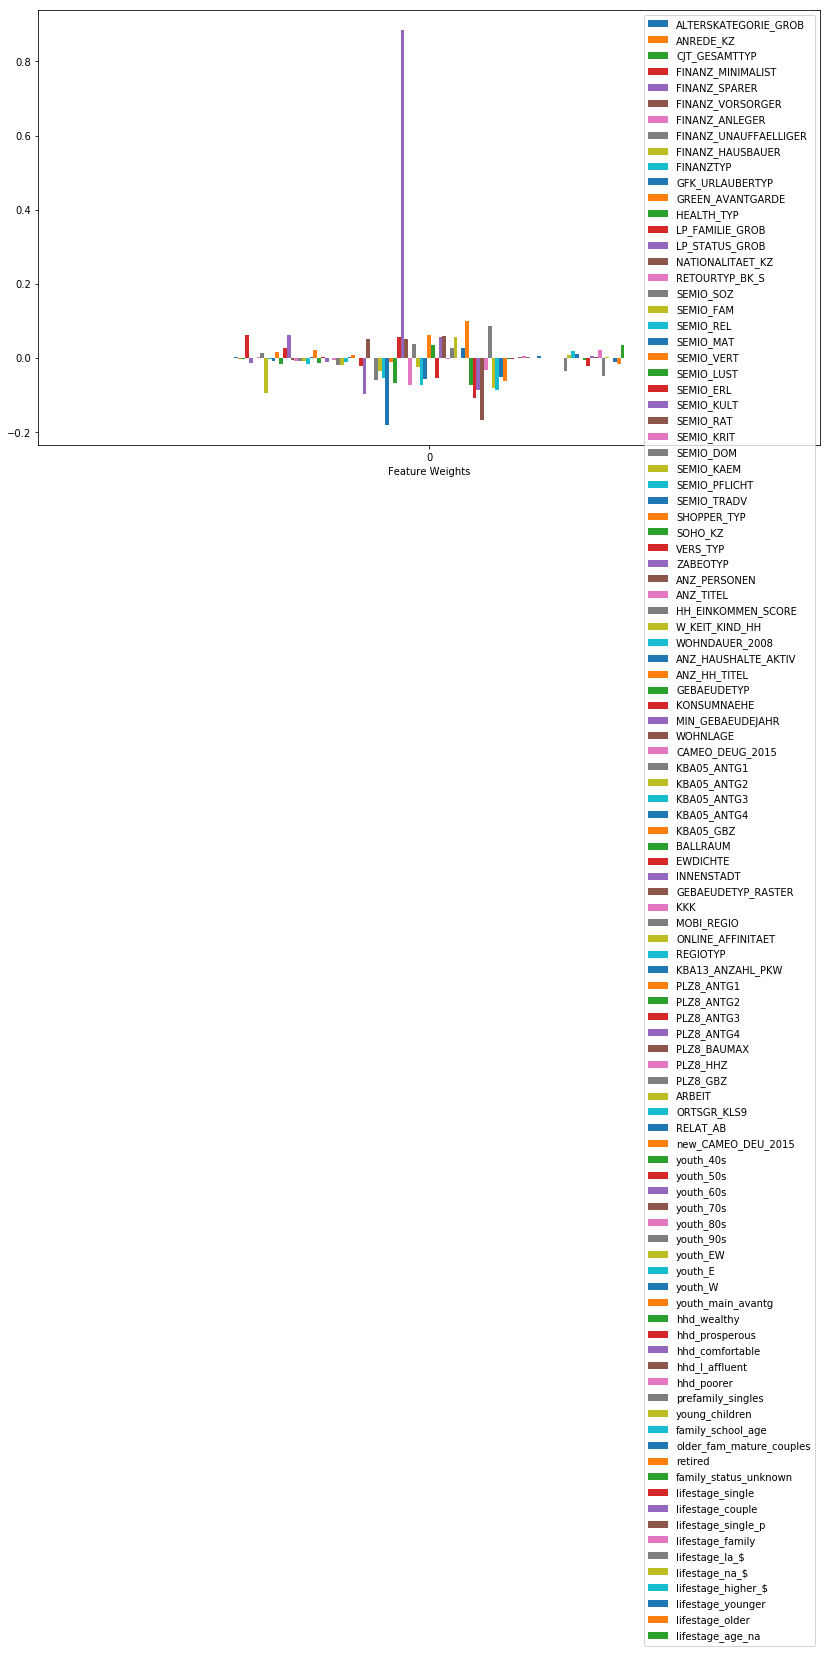

In [66]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

principal_compo = [0]

visualize_components(principal_compo)


In [59]:
print(df_graph.loc[0].sort_values(ascending=False).head(10))

MIN_GEBAEUDEJAHR      0.884382
PLZ8_ANTG1            0.099069
PLZ8_GBZ              0.086502
KBA05_GBZ             0.063193
FINANZ_MINIMALIST     0.062642
LP_STATUS_GROB        0.060806
GEBAEUDETYP_RASTER    0.060535
INNENSTADT            0.057718
KONSUMNAEHE           0.056815
ONLINE_AFFINITAET     0.056145
Name: 0, dtype: float64


## Feature weights scoring high on this graph of 0_th component
(+ effect items)

top earner new home maker in urban area 

### MIN_GEBAEUDEJAHR      0.884382   
First year building was mentioned in the database -- new home
### PLZ8_ANTG1            0.099069 
Number of 1-2 family houses in the PLZ8 region
### PLZ8_GBZ              0.086502 
Number of buildings within the PLZ8 region -- high
### KBA05_GBZ             0.063193 
Number of buildings in the microcell - high
### FINANZ_MINIMALIST     0.062642 
low financial interest - low
### LP_STATUS_GROB        0.060806 
TOP EARNERS
### GEBAEUDETYP_RASTER    0.060535 
Ratio of residential to commercial activity - RESIDENTIAL
### INNENSTADT            0.057718 
Distance to city center (downtown) - MORE THAN 40KM
### KONSUMNAEHE           0.056815 
Distance from building to point of sale (PoS) - FURTHER
### ONLINE_AFFINITAET     0.056145 
Online affinity - HIGHER


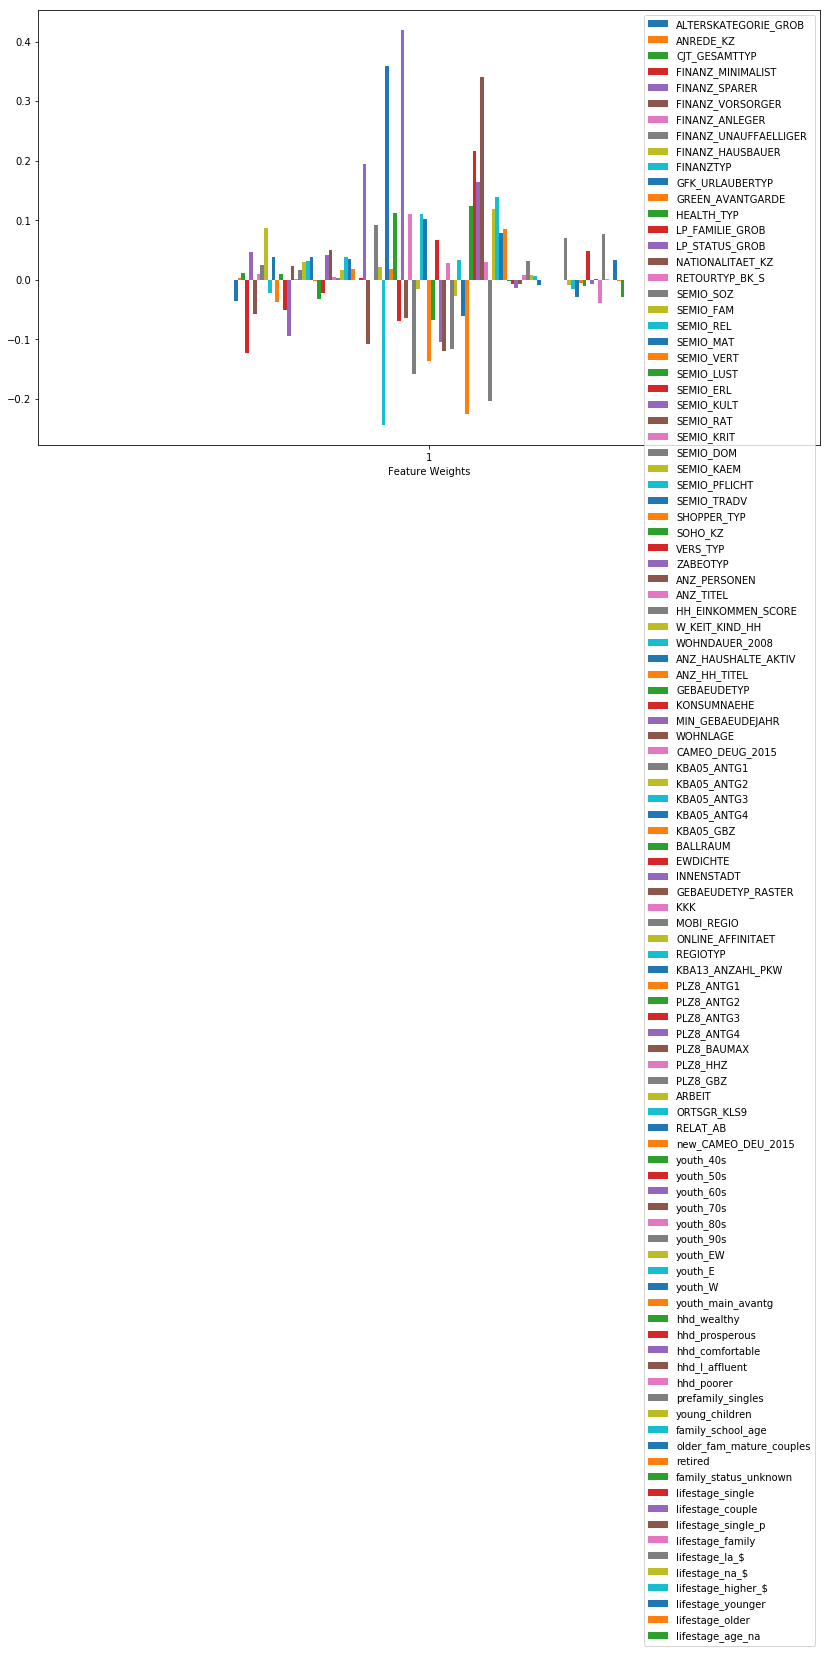

In [60]:
visualize_components([1])

In [61]:
print(df_graph.loc[1].sort_values(ascending=False).head(10))

MIN_GEBAEUDEJAHR       0.419149
ANZ_HAUSHALTE_AKTIV    0.359288
PLZ8_BAUMAX            0.340943
PLZ8_ANTG3             0.215673
ZABEOTYP               0.193732
PLZ8_ANTG4             0.163903
ORTSGR_KLS9            0.139297
PLZ8_ANTG2             0.122918
ARBEIT                 0.119023
GEBAEUDETYP            0.111429
Name: 1, dtype: float64


## Feature weights scoring high on this graph of 1_st component
(+ factors)

city dwellers in new home

### MIN_GEBAEUDEJAHR       0.419149
First year building was mentioned in the database -- new home
### ANZ_HAUSHALTE_AKTIV    0.359288 
Number of households in the building -- higher
### PLZ8_BAUMAX            0.340943 
Most common building type within the PLZ8 region - buseinss buildings
### PLZ8_ANTG3             0.215673 
Number of 6-10 family houses in the PLZ8 region - higher
### ZABEOTYP               0.193732 
Energy consumption typology - unknown
### PLZ8_ANTG4             0.163903 
Number of 10+ family houses in the PLZ8 region - higher
### ORTSGR_KLS9            0.139297 
Size of community - bigger
### PLZ8_ANTG2             0.122918 
Number of 3-5 family houses in the PLZ8 region - higher
### ARBEIT                 0.119023 
Share of unemployment in community - higher
### GEBAEUDETYP            0.111429 
Type of building (residential vs. commercial) - mixed


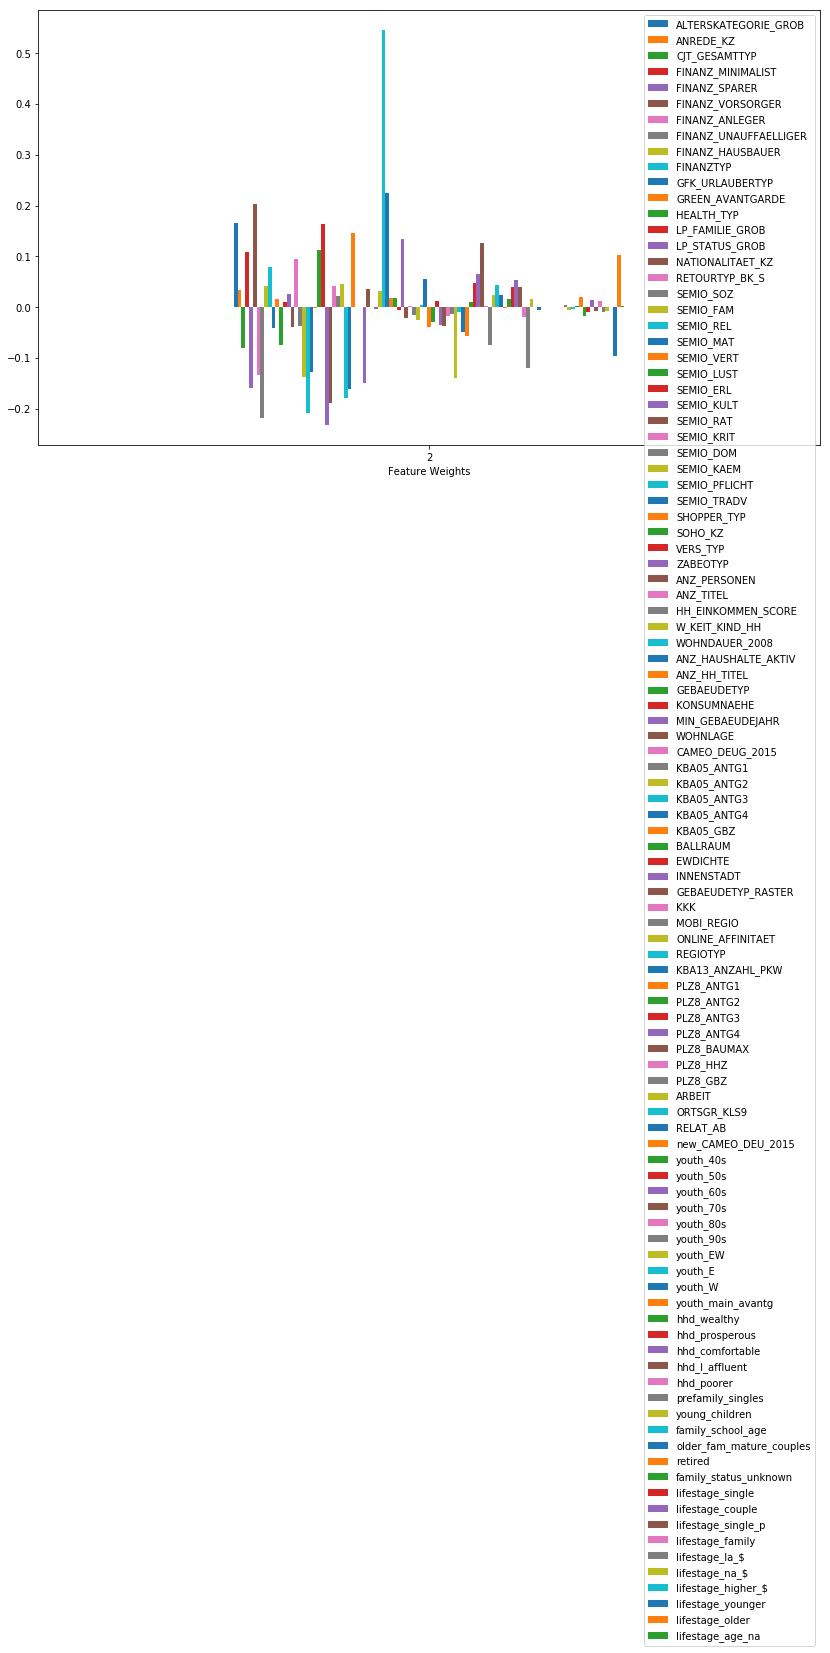

In [63]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

principal_compo = [2]

visualize_components(principal_compo)

In [64]:
print(df_graph.loc[2].sort_values(ascending=False).head(10))

WOHNDAUER_2008          0.545736
ANZ_HAUSHALTE_AKTIV     0.224839
FINANZ_VORSORGER        0.203929
ALTERSKATEGORIE_GROB    0.165666
SEMIO_ERL               0.164625
SHOPPER_TYP             0.145747
MIN_GEBAEUDEJAHR        0.134007
PLZ8_BAUMAX             0.126031
SEMIO_LUST              0.112255
FINANZ_MINIMALIST       0.108699
Name: 2, dtype: float64


## Feature weights scoring high on this graph of 2_nd component
(+ factors)

frugal older family in old residence 

### WOHNDAUER_2008          0.545736 
Length of residence - LONGER
### ANZ_HAUSHALTE_AKTIV     0.224839 
Number of households in the building -- higher
### FINANZ_VORSORGER        0.203929
Finance type - be prepared -- lower
### ALTERSKATEGORIE_GROB    0.165666
Estimated age based on given name analysis - higher
### SEMIO_ERL               0.164625 
event oriented -- low
### SHOPPER_TYP             0.145747 
demanding shopper
### MIN_GEBAEUDEJAHR        0.134007 
First year building was mentioned in the database -- newer home
### PLZ8_BAUMAX             0.126031 
Most common building type within the PLZ8 region - buseinss buildings
### SEMIO_LUST              0.112255 
seusual minded -- low
### FINANZ_MINIMALIST       0.108699 
finance interested --low

In [67]:
#above 3 components makes up 30% of whole data
pca_fitted.explained_variance_ratio_[:3].sum()


0.40702926267464568

### Discussion 2.3: Interpret Principal Components

* component 1: Working class city dwellers, of younger singles to family --- city dwellers ---
* component 2: Older, religious and finacially beter off peoople living with children --- Chirsitian Party ---
* component 3: Cultrally and socially minded  --- Intellectuals ---


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [67]:
pca.components_.shape

from sklearn.cluster import KMeans

kmeans_cluster_labels = []
kmeans_clusterer_list = []

testrange = [10, 15, 20, 25, 30, 36]

for k_clusters in testrange:
    
    kmeans_clusterer = KMeans(n_clusters = k_clusters)
    
    cluster_labels = kmeans_clusterer.fit_predict(x_pca)
    
    kmeans_score = kmeans_clusterer.score(x_pca)  # missing fit? ---- check!!!!
    
    #kmeans_prediction = kmeans_model.predict(df_cleaned)
    
    #kmeans_cluster_labels.append(kmeans_prediction)
    
    #kmeans_clusterer_list.append(kmeans_clusterer.cluster_centers_)
    
    print("n_cluster {} has kmeans score of {}".format(k_clusters, kmeans_score))

n_cluster 10 has kmeans score of -24192464.47711829
n_cluster 15 has kmeans score of -22080247.17898097
n_cluster 20 has kmeans score of -20906745.992357597
n_cluster 25 has kmeans score of -20052117.082826424
n_cluster 30 has kmeans score of -19400385.841504324
n_cluster 36 has kmeans score of -18796193.04219565


2
37885112.0507
5
29115048.4794
10
24199055.8915
13
22804127.9445
15
22122119.7576
20
20903885.2767
23
20339913.4671
25
20028932.2339
30
19406465.1933
32
19193776.429


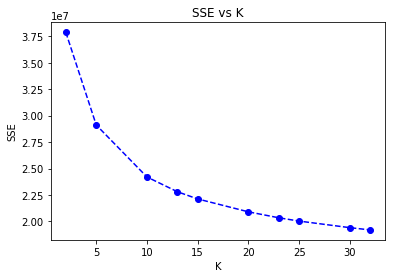

In [57]:
from sklearn.cluster import KMeans

scores = []
centers = [2,5,10,13,15,20,23,25,30,32]

for i in centers:
    
    mycl = i
    print(mycl)

    km = f"kmeans_{mycl}"
    kmod = f"model_{mycl}"
    km = KMeans(n_clusters = mycl)
    kmod = km.fit(x_pca)
    
    print(np.abs(kmod.score(x_pca)))
    scores.append(np.abs(kmod.score(x_pca)))

plt.plot(centers, scores, linestyle = '--', marker = 'o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs K');
    

In [66]:
from sklearn.cluster import KMeans

kmeans_cluster_labels = []
kmeans_clusterer_list = []

kmeans_clusterer = KMeans(n_clusters = 13)
kmeans_fit = kmeans_clusterer.fit(x_pca)
kmeans_transform = kmeans_fit.transform(x_pca)

kmeans_cluster_labels.append(kmeans_clusterer.fit_predict(x_pca))
kmeans_clusterer_list.append(kmeans_clusterer.cluster_centers_)


### Discussion 3.1: Apply Clustering to General Population

Although my scleeplot is not so much of clear 'elbow' shape, I take the nearest elbow point of 13

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [76]:
# Load in the customer demographics data.
import pandas as pd
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv", sep=";")

In [77]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers.shape

(191652, 85)

In [78]:
undrop_list

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

In [79]:
newundrop_list = undrop_list.drop('CAMEO_DEU_2015')

In [80]:
clean_cf = to_nan(customers)
print(clean_cf.shape)

remove_dellist(dellist, clean_cf)

undrop_index = undrop_list_index(clean_cf)
print(clean_cf.shape)

clean_cf = new_cameo_deu(clean_cf)
print(clean_cf.shape)


['-1', '0']
-1
AGER_TYP
0.0
AGER_TYP
['-1', '0', '9']
-1
ALTERSKATEGORIE_GROB
0
ALTERSKATEGORIE_GROB
9
ALTERSKATEGORIE_GROB
['-1', '0']
-1
ANREDE_KZ
0
ANREDE_KZ
['0']
0.0
CJT_GESAMTTYP
['-1']
-1
FINANZ_MINIMALIST
['-1']
-1
FINANZ_SPARER
['-1']
-1
FINANZ_VORSORGER
['-1']
-1
FINANZ_ANLEGER
['-1']
-1
FINANZ_UNAUFFAELLIGER
['-1']
-1
FINANZ_HAUSBAUER
['-1']
-1
FINANZTYP
['0']
0
GEBURTSJAHR
['']

GFK_URLAUBERTYP
['']

GREEN_AVANTGARDE
['-1', '0']
-1
HEALTH_TYP
0.0
HEALTH_TYP
['0']
0.0
LP_LEBENSPHASE_FEIN
['0']
0.0
LP_LEBENSPHASE_GROB
['0']
0.0
LP_FAMILIE_FEIN
['0']
0.0
LP_FAMILIE_GROB
['0']
0.0
LP_STATUS_FEIN
['0']
0.0
LP_STATUS_GROB
['-1', '0']
-1
NATIONALITAET_KZ
0
NATIONALITAET_KZ
['-1', '0']
-1
PRAEGENDE_JUGENDJAHRE
0
PRAEGENDE_JUGENDJAHRE
['0']
0.0
RETOURTYP_BK_S
['-1', '9']
-1
SEMIO_SOZ
9
SEMIO_SOZ
['-1', '9']
-1
SEMIO_FAM
9
SEMIO_FAM
['-1', '9']
-1
SEMIO_REL
9
SEMIO_REL
['-1', '9']
-1
SEMIO_MAT
9
SEMIO_MAT
['-1', '9']
-1
SEMIO_VERT
9
SEMIO_VERT
['-1', '9']
-1
SEMIO_LUST
9
SEMIO_LUST
[

In [81]:
clean_cf = clean_cf.iloc[:, undrop_index]
print(clean_cf.shape)
clean_cf = clean_data(clean_cf)

(191652, 79)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['EW', 'EW', 'EW', 'EW', 'EW', 'W', 'E', 'EW', 'EW', 'W', 'W', 'E', 'E', 'EW', 'EW']
{1: 'EW', 2: 'EW', 3: 'EW', 4: 'EW', 5: 'EW', 6: 'W', 7: 'E', 8: 'EW', 9: 'EW', 10: 'W', 11: 'W', 12: 'E', 13: 'E', 14: 'EW', 15: 'EW'}
0         1
1         0
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        0
16        1
17        1
18        1
19        1
20        0
21        1
22        1
23        1
24        1
25        0
26        1
27        1
28        1
29        1
         ..
191622    1
191623    0
191624    1
191625    1
191626    1
191627    1
191628    0
191629    1
191630    1
191631    1
191632    1
191633    0
191634    1
191635    1
191636    1
191637    1
191638    1
191639    0
191640    1
191641    1
191642    1
191643    0
191644    1
191645    1
191646    1
191647    1
191648    1
191649    1
191650

In [85]:
clean_cf = del_fein(clean_cf)

In [86]:
print(clean_cf.shape)
clean_cf.isna().sum()

(191652, 103)


ALTERSKATEGORIE_GROB          240
ANREDE_KZ                       0
CJT_GESAMTTYP                3213
FINANZ_MINIMALIST               0
FINANZ_SPARER                   0
FINANZ_VORSORGER                0
FINANZ_ANLEGER                  0
FINANZ_UNAUFFAELLIGER           0
FINANZ_HAUSBAUER                0
FINANZTYP                       0
GFK_URLAUBERTYP              3213
GREEN_AVANTGARDE                0
HEALTH_TYP                  48990
LP_FAMILIE_GROB             50582
LP_STATUS_GROB               3213
NATIONALITAET_KZ            48750
RETOURTYP_BK_S               3213
SEMIO_SOZ                       0
SEMIO_FAM                       0
SEMIO_REL                       0
SEMIO_MAT                       0
SEMIO_VERT                      0
SEMIO_LUST                      0
SEMIO_ERL                       0
SEMIO_KULT                      0
SEMIO_RAT                       0
SEMIO_KRIT                      0
SEMIO_DOM                       0
SEMIO_KAEM                      0
SEMIO_PFLICHT 

In [87]:
print(df_clean.shape)
print(clean_cf.shape)

(891221, 103)
(191652, 103)


In [88]:
# review suggested to use transform without fit though this does not work therefore I am using fit()
# ???? try to inherit the object transformed by imputer to scaler to pca without using fit() as of review
# NotFittedError


customer_imputer = simputer.transform(clean_cf)


In [89]:
pd.DataFrame(customer_imputer).isna().sum().sum()

0

In [128]:

customer_imputer_scaler = scaler_fit.transform(customer_imputer)


In [129]:
customer_imputer_scaler == df_cleaned   # different data 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [92]:
#customer data
#pca2 = PCA(n_components = 33)
#x_pca2 = pca2.transform(customer_imputer_scaler)
#print(pca2.explained_variance_ratio_)
#print(pca2.explained_variance_ratio_.sum())
#print(pca2.explained_variance_ratio_[:4].sum())
#ratio_customer = pca2.explained_variance_ratio_
#cst_components = pca2.components_

x_pca2 = pca_fitted.transform(customer_imputer_scaler)


In [93]:
kmeans_cluster_labels2 = []
kmeans_clusterer_list2 = []
#kmeans_clusterer2 = KMeans(n_clusters = 13)

#kmeans_cluster_labels2.append(kmeans_clusterer.predict(x_pca2))
#kmeans_clusterer_list2.append(kmeans_clusterer.cluster_centers_)
#print(np.abs(kmeans_clusterer.score(x_pca2)))

kmeans_cluster_labels2.append(kmeans_fit.predict(x_pca2))
kmeans_clusterer_list2.append(kmeans_fit.cluster_centers_)
print(np.abs(kmeans_fit.score(x_pca2)))

3842684.5057


2
5913908.58562
5
4199628.03495
10
3483262.64554
13
3269630.85181
15
3162689.79529
20
2970983.87691
23
2891908.01435
25
2843982.14092
30
2750314.52298
32
2716278.46147


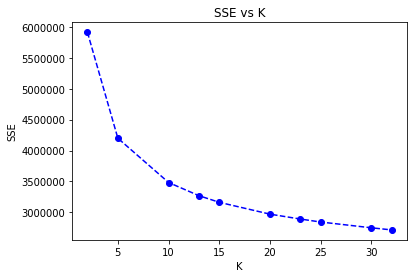

In [72]:
scores = []
centers = [2,5,10,13,15,20,23,25,30,32]

for i in centers:
    
    mycl = i
    print(mycl)

    km = f"kmeans_{mycl}"
    kmod = f"model_{mycl}"
    km = KMeans(n_clusters = mycl)
    kmod = km.fit(x_pca2)
    
    print(np.abs(kmod.score(x_pca2)))
    scores.append(np.abs(kmod.score(x_pca2)))

plt.plot(centers, scores, linestyle = '--', marker = 'o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs K');

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [137]:
kmeans_transform
print(kmeans_cluster_labels2 )
print(kmeans_clusterer_list2[0][0])
print(kmeans_clusterer_list[0][0])

[array([10,  4,  4, ..., 10, 10, 12], dtype=int32)]
[-0.5157448  -0.59488825 -1.52388634 -0.81017089  0.75968671  1.01551776
  0.26801927 -1.19377669 -0.31378457  0.32264818 -0.16594863  0.32056437
  0.36102333  0.03706284  0.03333449  0.12528314 -0.05210473  0.12646814
 -0.06345589  0.1218216  -0.00634229 -0.02029693 -0.01365843 -0.0735123
  0.0749337  -0.02177972  0.04742274 -0.0190781   0.03691097  0.06604635
 -0.08089221  0.01616673 -0.00517333]
[-0.5157448  -0.59488825 -1.52388634 -0.81017089  0.75968671  1.01551776
  0.26801927 -1.19377669 -0.31378457  0.32264818 -0.16594863  0.32056437
  0.36102333  0.03706284  0.03333449  0.12528314 -0.05210473  0.12646814
 -0.06345589  0.1218216  -0.00634229 -0.02029693 -0.01365843 -0.0735123
  0.0749337  -0.02177972  0.04742274 -0.0190781   0.03691097  0.06604635
 -0.08089221  0.01616673 -0.00517333]


In [148]:
df_c1 = pd.DataFrame(pca_fitted.inverse_transform(kmeans_clusterer_list2[0][1])).transpose()
df_c1.columns = list(clean_cf.columns)
df_c1

df_g1 = pd.DataFrame(pca_fitted.inverse_transform(kmeans_clusterer_list[0][1])).transpose()
df_g1.columns = list(clean_cf.columns)
df_g1

print(pd.concat([df_c1, df_g1]))


   ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0             -0.128533  -0.484332      -0.109125           0.392216   
0             -0.128533  -0.484332      -0.109125           0.392216   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0      -0.109197          0.116309        0.038051              -0.022458   
0      -0.109197          0.116309        0.038051              -0.022458   

   FINANZ_HAUSBAUER  FINANZTYP        ...         lifestage_single  \
0          -0.58963  -0.040314        ...                 0.380792   
0          -0.58963  -0.040314        ...                 0.380792   

   lifestage_couple  lifestage_single_p  lifestage_family  lifestage_la_$  \
0          0.127074            0.044914          0.416579       -0.765271   
0          0.127074            0.044914          0.416579       -0.765271   

   lifestage_na_$  lifestage_higher_$  lifestage_younger  lifestage_older  \
0        0.044914              

In [115]:
ratio_customer = pca_fitted.explained_variance_ratio_
ratio_gen = pca.explained_variance_ratio_

ratio_joined = zip(ratio_gen, ratio_customer, ratio_customer - ratio_gen)

for v in ratio_joined:
    print(v)

(0.19928551531165131, 0.19928551531165131, 0.0)
(0.13498420212904882, 0.13498420212904882, 0.0)
(0.07275954523394558, 0.07275954523394558, 0.0)
(0.057217038524244417, 0.057217038524244417, 0.0)
(0.052029373145836548, 0.052029373145836548, 0.0)
(0.044540311014311475, 0.044540311014311475, 0.0)
(0.036416312967658335, 0.036416312967658335, 0.0)
(0.033419479967451295, 0.033419479967451295, 0.0)
(0.03027130669504887, 0.03027130669504887, 0.0)
(0.025597404648935482, 0.025597404648935482, 0.0)
(0.021551617329166564, 0.021551617329166564, 0.0)
(0.020620172681594742, 0.020620172681594742, 0.0)
(0.017343135782409334, 0.017343135782409334, 0.0)
(0.015604437349622111, 0.015604437349622111, 0.0)
(0.013817108593647542, 0.013817108593647542, 0.0)
(0.012282418200718976, 0.012282418200718976, 0.0)
(0.011537391807234718, 0.011537391807234718, 0.0)
(0.011078164762424098, 0.011078164762424098, 0.0)
(0.010551554412746302, 0.010551554412746302, 0.0)
(0.009956944161896835, 0.009956944161896835, 0.0)
(0.00931

In [116]:
# over represented top5
print(pd.DataFrame(ratio_customer - ratio_gen).sort_values(by = 0, ascending = False).head(5))
# under representd top5
pd.DataFrame(ratio_customer - ratio_gen).sort_values(by = 0, ascending = True).head(5)

           0
2   0.046270
12  0.001936
10  0.000981
11  0.000363
21  0.000278


,0
0,-0.017904
3,-0.007125
5,-0.005154
4,-0.005108
8,-0.004057


In [103]:
def visualize_components2(principal_components):
#principal_components=[0,1, 34, 35]

    fig, [ax1, ax2] = plt.subplots(1,2)
    fig.set_size_inches(18, 7)

    df_graph2 = pd.DataFrame(pca2.components_[principal_components]).transpose()
    graph2_top = pd.DataFrame(pca2.components_[principal_components]).sort_values(by = 0, ascending = False).head(10).index
    pd.DataFrame(df_graph2).columns = list(df_clean.columns)
    df_graph2 = df_graph2.iloc[:, graph2_top]
    
    df_graph = pd.DataFrame(pca.components_[principal_components]).transpose()
    graph_top = pd.DataFrame(pca.components_[principal_components]).sort_values(by = 0, ascending = False).head(10).index
    pd.DataFrame(df_graph).columns = list(df_clean.columns)
    df_graph = df_graph.iloc[:, graph_top]

    df_graph.plot(ax = ax1, kind = 'bar')
    
    df_graph2.plot(ax = ax2, kind = 'bar')
    ax1.set_xlabel("Feature Weights")
    ax1.set_title("General Demographics")
    ax1.set_xticklabels(principal_components.__str__(), rotation = 0)
    plt.legend='topright'
    plt.title("Customer data")

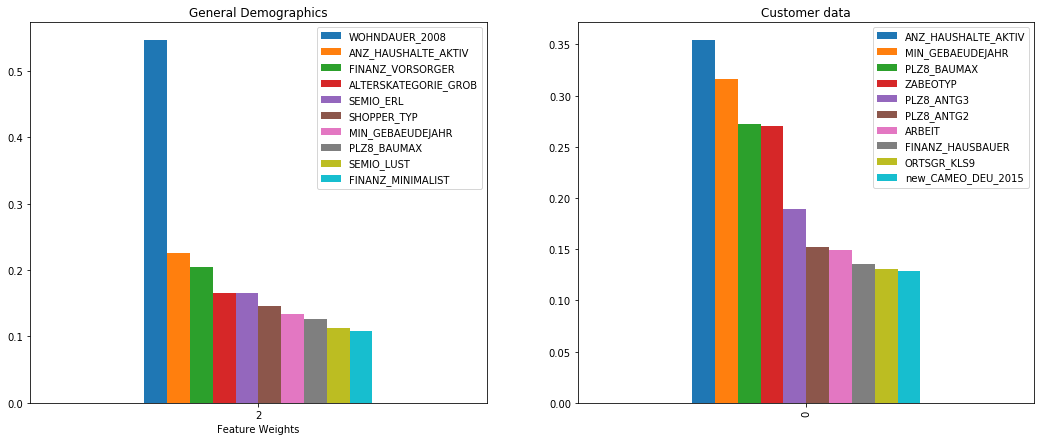

In [117]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# 3rd, 13th, 11th, 12th of the customer data are over-represented
# 3rd element below
visualize_components2(2)

### over represented in customer data 3RD component  --- LOW RIDER

* ANZ_HAUSHALTE_AKTIV Number of households in the building -- HIGHER
* MIN_GEBAEUDEJAHR First year building was mentioned in the database -- new home
* PLZ8_BAUMAX Most common building type within the PLZ8 region -- COMMERCIAL
* ZABEOTYP Energy consumption typology -- UNKNOWN
* PLZ8_ANTG3 Number of 6-10 family houses in the PLZ8 region -- HIGH SHARE
* PLZ8_ANTG2 Number of 3-5 family houses in the PLZ8 region -- VERY HIGH SHARE
* ARBEIT Share of unemployment in community -- UNKNOWN/VERY HIGH
* Finanze Hausbauer  Finance type homeownership LOW
* ORTSGR_KLS9 small size community
* NEW_CAMEO_DEU_2015 WEALTH AND LIFE -- LOWER



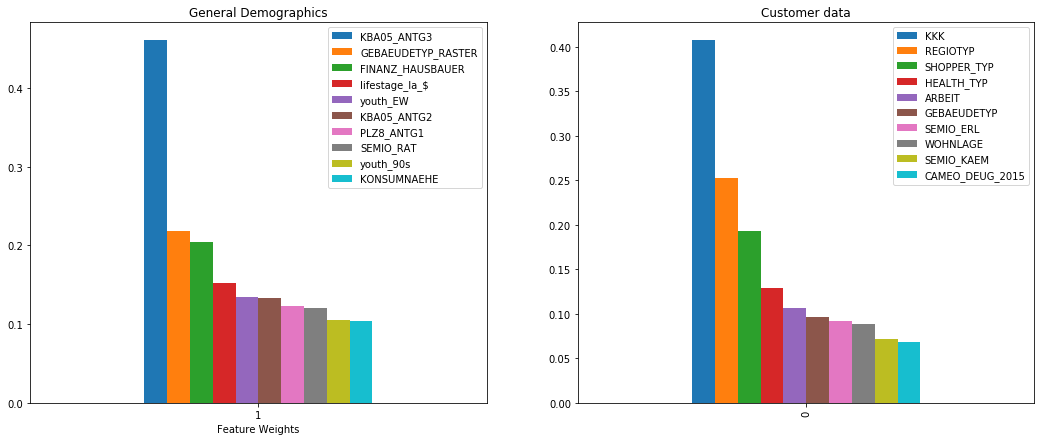

In [118]:
visualize_components2(12)

### Over represented in customer data 13th component --- WORKING CLASS 


* KKK urchasing power in region -- LOW
* REGIOTYP Neighborhood typology -- LOWER
* SHOPPER_TYP Shopper typology -- DEMANDING SHOPPER
* HEALTH_TYP jaunty hedonists
* ARBEIT Share of unemployment in community -- VERY HIGH OR UNKNOWN
* GEBAEUDETYP Type of building (residential vs. commercial) -- MIXED
* SEMIO_ERL EVENT ORIENTED
* WOHNLAGE new building in rural neighborhood
* SEMIO_KAEM COMBATIVE
* CAMEO_DEUG_2015 -- WORKING CLASS


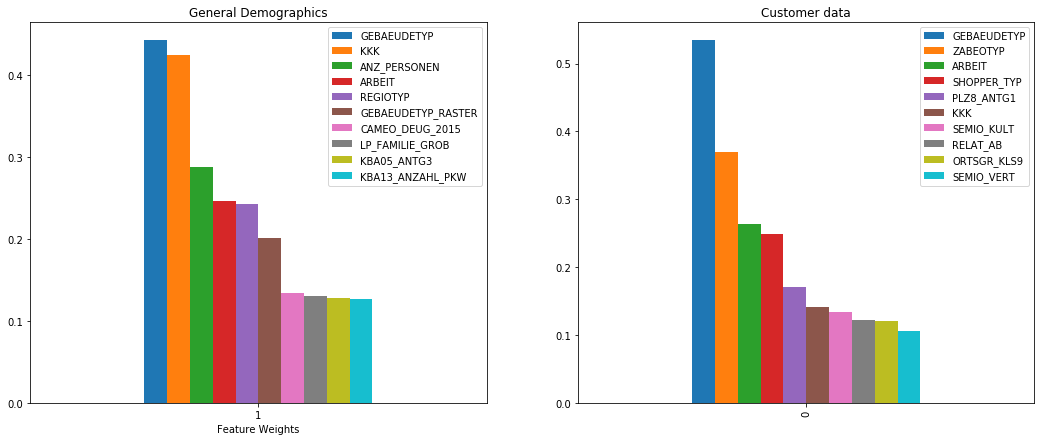

In [119]:
visualize_components2(10)

### Over represented in customer data 11TH component --- CULTURALLY MINDED WORKING CLASS


* GEBAEUDETYP Type of building (residential vs. commercial) -- MIXED
* ZABEOTYP Energy consumption typology -- UNKNOWN
* ARBEIT Share of unemployment in community -- VERY HIGH OR UNKNOWN
* SHOPPER_TYP Shopper typology -- DEMANDING SHOPPER
* PLZ8_ANTG1 Number of 1-2 family houses in the PLZ8 region -- VERY HIGH SHARE
* KKK Purchasing power in region -- LOW
* SEMIO_KULT CULTURE MINDED
* RELAT_AB Share of unemployment relative to county in which community is contained -- VERY HIGH OR UNKNOWN
* ORTSGR_KLS9 small size community
* SEMIO_VERT DREAMFUL


In [108]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#4(0.047138670285271432, 0.051501988908143705, -0.0043633186228722726)
#5(0.038277539926332642, 0.03874056867053767, -0.00046302874420502821)
#6(0.034741180286340372, 0.032561179360700646, 0.002180000925639726)
#7(0.024278004712459125, 0.02979275531387016, -0.0055147506014110344)

def visualize_components3(principal_components):
#principal_components=[0,1, 34, 35]

    fig, [ax1, ax2] = plt.subplots(1,2)
    fig.set_size_inches(18, 7)

    df_graph2 = pd.DataFrame(pca2.components_[principal_components]).transpose()
    graph2_top = pd.DataFrame(pca2.components_[principal_components]).sort_values(by = 0, ascending = True).head(10).index
    pd.DataFrame(df_graph2).columns = list(df_clean.columns)
    df_graph2 = df_graph2.iloc[:, graph2_top]
    
    df_graph = pd.DataFrame(pca.components_[principal_components]).transpose()
    graph_top = pd.DataFrame(pca.components_[principal_components]).sort_values(by = 0, ascending = True).head(10).index
    pd.DataFrame(df_graph).columns = list(df_clean.columns)
    df_graph = df_graph.iloc[:, graph_top]

    df_graph.plot(ax = ax1, kind = 'bar')
    
    df_graph2.plot(ax = ax2, kind = 'bar')
    ax1.set_xlabel("Feature Weights")
    ax1.set_title("General Demographics")
    ax1.set_xticklabels(principal_components.__str__(), rotation = 0)
    plt.legend='topright'
    plt.title("Customer data")

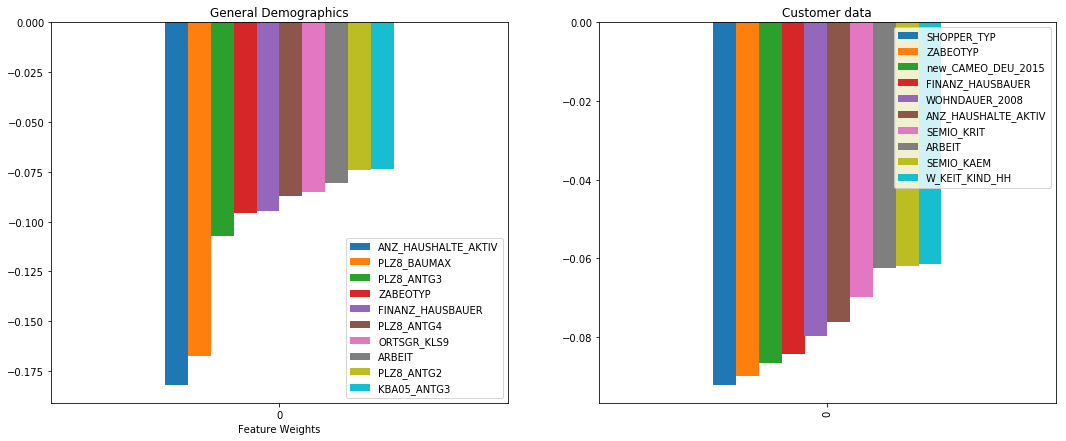

In [109]:
visualize_components3(0)

### under-represented in customer data 1st component --- HAPPY FAMILY SHOPPER WITH HOMEOWNERSHIP

* SHOPPER_TYP external supplied hedonists
* ZEBEOTYP Energy consumption typology UNKNOWN/GREEN
* NEW_CAMEO_DEU_2015 WEALTH/LIFE HIGHER
* FINANZ_HAUSBAUER HOME OWNERSHIP -- HIGH
* WOHNDAUER_2008 Length of residence SHORT
* ANZ_HAUSHALTE_AKTIV Number of households in the building -- LOWER
* SEMIO_KRIT CRITICAL MINDED -- HIGHER
* ARBEIT Share of unemployment in community -- LOWER
* SEMIO_KAEM COMBATIVE -- HIGH
* W_KEIT_KIND_HH Likelihood of children in household UNKNOWN OR HIGHLY LIKELY


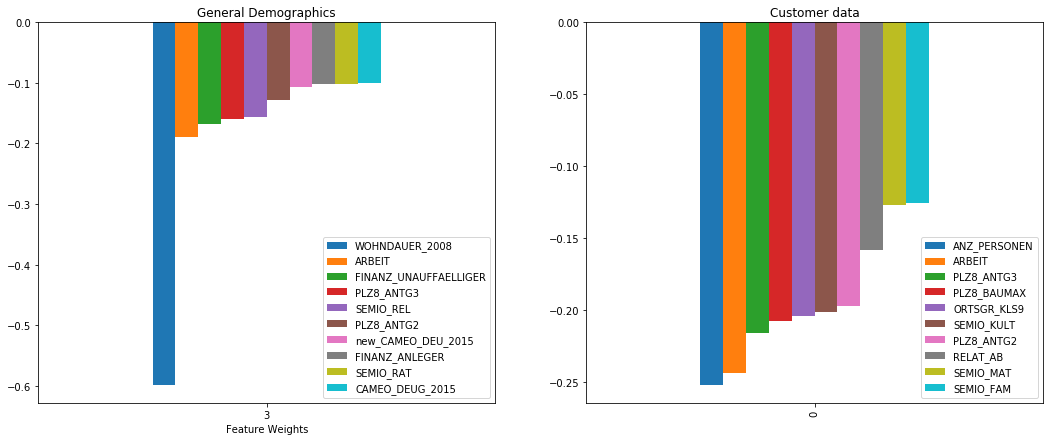

In [110]:
visualize_components3(3)

### under-represented in customer data 4th component --- CULTRALLY MINDED FAMILY IN SMALLER COMMUNITY

* ANZ_PERSONEN Number of adults in household -- LOWER
* ARBEIT Share of unemployment in community -- LOWER
* PLZ8_ANTG3 Number of 6-10 family houses in the PLZ8 region -- LOW SHARE
* PLZ8_BAUMAX Most common building type within the PLZ8 region -- RESIDENTIAL
* ORTSGR_KL9 SIZE OF COMMUNITY - SMALLER
* SEMIO_KULT CULTRALLY MINDED
* PLZ8_ANTG2 Number of 3-5 family houses in the PLZ8 region LOW SHARE
* RELAT_AB Share of unemployment relative to county in which community is contained -- LOW
* SEMIO_MAT MATERIALISTIC
* SEMIO_FAM FAMILY MINDED


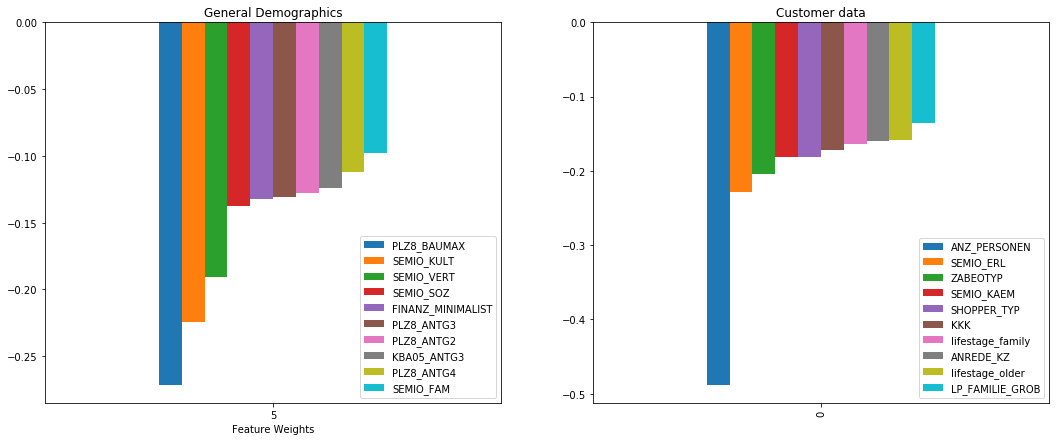

In [112]:
visualize_components3(5)

### under-represented in customer data 6TH component --- MIXED TYPE OF FAMILY

* ANZ_PERSONEN Number of adults in household -- LOWER
* SEMIO_ERL EVENT ORIENTED
* ZEBEOTYP Energy consumption typology UNKNOWN/GREEN
* SEMIO_KAEM COMBATIVE -- HIGH
* SHOPPER_TYP external supplied hedonists
* KKK Purchasing power in region -- HIGH
* LIFESTAGE_FAMILY
* ANREDE_KZ GENDER - UNKNOWN
* LIFESATAGE_OLDER
* LP_FAMILIE_GROB - SINGLE/COUPLE/SINGLE PARENT

### Discussion 3.3: Compare Customer Data to Demographics Data


My Findings:

Over represented groups -- popular with mail order company
* low rider --- low in financial savings, investment, religiousness 
* working class 
* intellectual working class

seems mail order is targeting working class people


Under represented groups -- unpopular with mail order company
* homeowner family
* intellectual family
* mixed family (older, single parent)

These grops of families have no element showing economic power is low on them, though under represented and not liked by the company, this is curious specially for the 1st group of homeowners for them being hedonistic shoppers

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.